# 1. Project Title: [Customer Segmentation]

---

### a. Project Overview

- **Project Summary:** The project involves clustering, classification, and regression tasks, analyzing a dataset related to cars.
- **Dataset:** A dataset named `CAR_DETAILS_FROM_CAR_DEKHO.csv`
- **Milestones:** Outline the key milestones or phases of the project. For example:
  - Data Collection
  - Data Preprocessing
  - Model Selection
  - Model Training and Evaluation
  - Results and Conclusion

### c. About the Author

- **Name:** Ahmed Ferganey
- **Background:** Embedded AI Engineer with expertise in Project Management, Embedded Systems, AI. Passionate about integrating advanced AI into automotive software to drive innovation, optimize performance, and enhance user experience. Problem-solver and collaborative communicator committed to advancing intelligent automotive systems.
- **Contact:** [LinkedIn Profile](https://www.linkedin.com/in/ahmed-ferganey/)

### d. Tools and Technologies

- **Programming Languages:** Python
- **Libraries and Frameworks:** scikit-learn, TensorFlow, NumPy, pandas
- **Software and Tools:** Jupyter Notebook, Git, Matplotlib, Seaborn

### e. Dataset Description

- **Dataset Name:** CAR_DETAILS_FROM_CAR_DEKHO.csv
- **Source:** Dataset sourced from CarDekho's car details. [Link not provided]
- **Description:**
  - The dataset contains multiple features related to cars, such as price, engine type, mileage, etc.
  - Target variables vary depending on the task (e.g., clusters, car categories, or price).
  - Includes missing data and categorical variables requiring preprocessing.
- **Data Preprocessing:**
  - Impute missing values with `SimpleImputer`
  - Normalize numerical features using `StandardScaler`
  - Encode categorical data using `LabelEncoder` or `OneHotEncoder`
  - Perform feature selection with `SelectKBest` and ANOVA (`f_classif`)

### f. Methodology

- **Model Selection:**
  - KMeans Clustering for customer segmentation
  - Random Forest and SVM for classification tasks
  - Linear Regression for predicting car prices
- **Evaluation Metrics:**
  - Accuracy, Confusion Matrix, Classification Report for classification
  - Mean Squared Error (MSE) for regression
- **Validation Strategy:**
  - Cross-validation for robust performance measurement
  - GridSearchCV for hyperparameter optimization

### g. Algorithms Used

- **Algorithms:**
  - **Clustering Algorithms:**
    - KMeans Clustering
    - DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
    - Gaussian Mixture Model (GMM)
  - **Classification Algorithms:**
    - Logistic Regression
    - Random Forest Classifier
    - Support Vector Classifier (SVC)
    - K-Nearest Neighbors (KNN)
  - **Regression Algorithms:**
    - Linear Regression
    - Random Forest Regressor
  - **Dimensionality Reduction:**
    - Principal Component Analysis (PCA)

### h. Results and Conclusion

- **Key Findings:**
  - Effective clustering of customers using KMeans with a high Silhouette Score.
  - Random Forest Classifier achieved high accuracy for car classification tasks.
  - Linear Regression provided reasonable predictions for car prices, with low MSE.
- **Impact:**
  - Enhanced understanding of customer segments in the automotive domain.
  - Improved car classification and price prediction, contributing to strategic business insights.



<span style="color: yellow; font-weight: bold;">**1. Importing libraries**</span>



In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import joblib  # or use `import pickle` if preferred

<span style="color: red; font-weight: bold;">**2. Importing data**</span>

In [2]:
# Load the dataset
path = '/media/ahmed-ferganey/AI4/05-InterviewQuestions/Dataset/CAR_DETAILS_FROM_CAR_DEKHO.csv'  # Replace with the actual dataset URL or path
rawdata = pd.read_csv(path)

rawdata

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]

<span style="color: green; font-weight: bold;">**3. Data Cleaning & Descriptive Statistics**</span>



In [3]:
rawdata.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
rawdata['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [6]:
rawdata['owner'].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [7]:
rawdata['km_driven'].min()

1

In [8]:

rawdata['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [9]:
imputer = SimpleImputer(strategy='mean')
rawdata[['selling_price', 'km_driven']] = imputer.fit_transform(rawdata[['selling_price', 'km_driven']])


In [10]:
rawdata

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007        60000.0    70000.0   
1                Maruti Wagon R LXI Minor  2007       135000.0    50000.0   
2                    Hyundai Verna 1.6 SX  2012       600000.0   100000.0   
3                  Datsun RediGO T Option  2017       250000.0    46000.0   
4                   Honda Amaze VX i-DTEC  2014       450000.0   141000.0   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014       409999.0    80000.0   
4336           Hyundai i20 Magna 1.4 CRDi  2014       409999.0    80000.0   
4337                  Maruti 800 AC BSIII  2009       110000.0    83000.0   
4338     Hyundai Creta 1.6 CRDi SX Option  2016       865000.0    90000.0   
4339                     Renault KWID RXT  2016       225000.0    40000.0   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[4340 rows x 8 columns]

**Remove Duplicate Rows**

In [11]:

#######################################

# Check data types of columns
print(rawdata.dtypes)

# Check for missing values
print(rawdata.isnull().sum())


#######################################

duplicates = rawdata.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

#######################################

# Remove duplicate rows
cleaned_data_no_duplication_V1 = rawdata.drop_duplicates()

# Check the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {cleaned_data_no_duplication_V1.shape[0]}")

# Verify no duplicates remain
duplicates_after = cleaned_data_no_duplication_V1.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {duplicates_after}")

# Save cleaned data to a CSV file
cleaned_data_no_duplication_V1.to_csv('cleaned_data_no_duplication_V1.csv', index=False)

#######################################

cleaned_data_no_duplication_V1


name              object
year               int64
selling_price    float64
km_driven        float64
fuel              object
seller_type       object
transmission      object
owner             object
dtype: object
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64
Number of duplicate rows: 763
Number of rows after removing duplicates: 3577
Number of duplicate rows after cleaning: 0


name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007        60000.0    70000.0   
1                Maruti Wagon R LXI Minor  2007       135000.0    50000.0   
2                    Hyundai Verna 1.6 SX  2012       600000.0   100000.0   
3                  Datsun RediGO T Option  2017       250000.0    46000.0   
4                   Honda Amaze VX i-DTEC  2014       450000.0   141000.0   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014       409999.0    80000.0   
4336           Hyundai i20 Magna 1.4 CRDi  2014       409999.0    80000.0   
4337                  Maruti 800 AC BSIII  2009       110000.0    83000.0   
4338     Hyundai Creta 1.6 CRDi SX Option  2016       865000.0    90000.0   
4339                     Renault KWID RXT  2016       225000.0    40000.0   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[3577 rows x 8 columns]

In [12]:
# Define the function to count outliers based on IQR
def count_outliers(data, var, target):
    Q1 = data.groupby(var)[target].quantile(0.25)
    Q3 = data.groupby(var)[target].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = pd.Series(0, index=data.index)
    for category in data[var].unique():
        outliers += ((data[var] == category) & ((data[target] < lower_bound[category]) | (data[target] > upper_bound[category])))
    
    return outliers.sum()


# Define the function to flag outliers based on IQR
def flag_outliers(data, var, target):
    Q1 = data.groupby(var)[target].quantile(0.25)
    Q3 = data.groupby(var)[target].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a boolean series to flag outliers
    outliers = pd.Series(False, index=data.index)
    for category in data[var].unique():
        outliers |= (data[var] == category) & ((data[target] < lower_bound[category]) | (data[target] > upper_bound[category]))
    
    return outliers    

Total unique outliers across all categories: 277


/tmp/ipykernel_391303/1609881516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_no_duplication_V1.loc[:, 'is_outlier'] = False


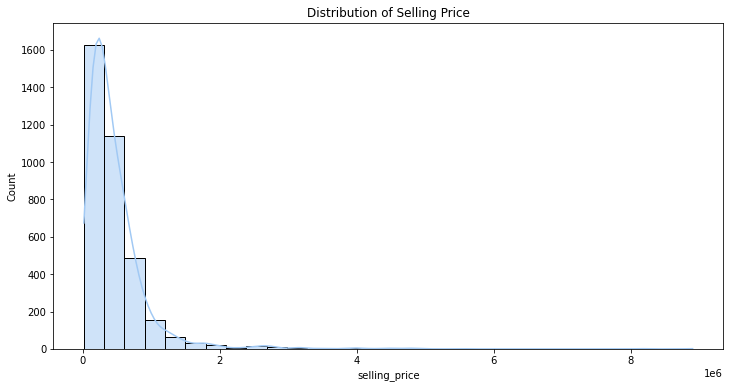

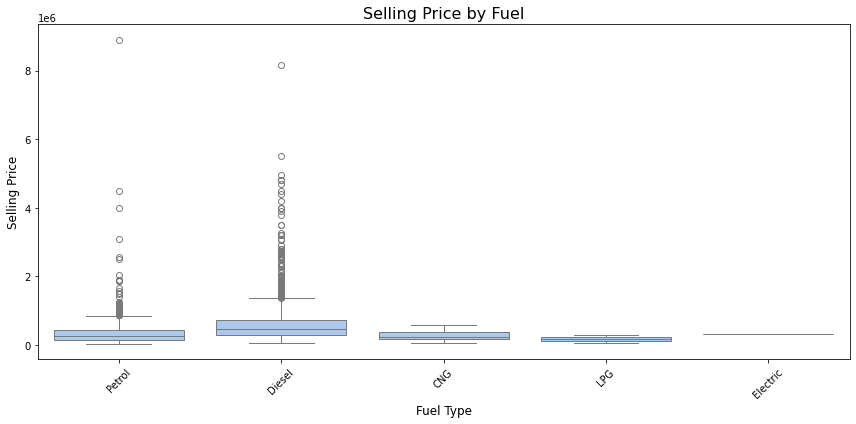

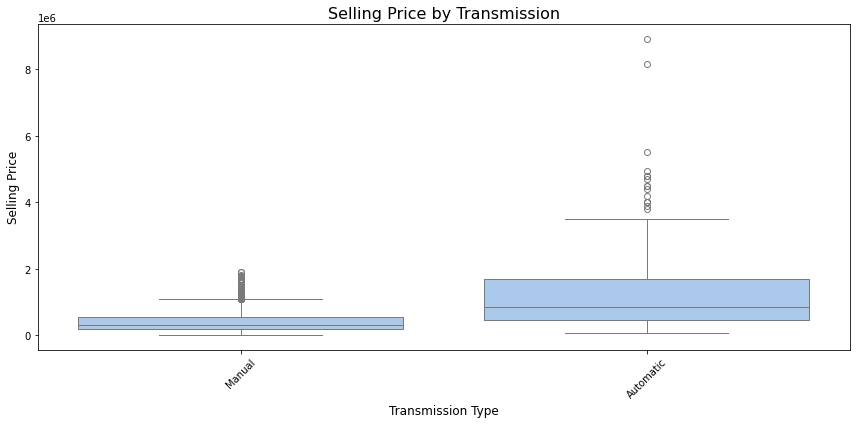

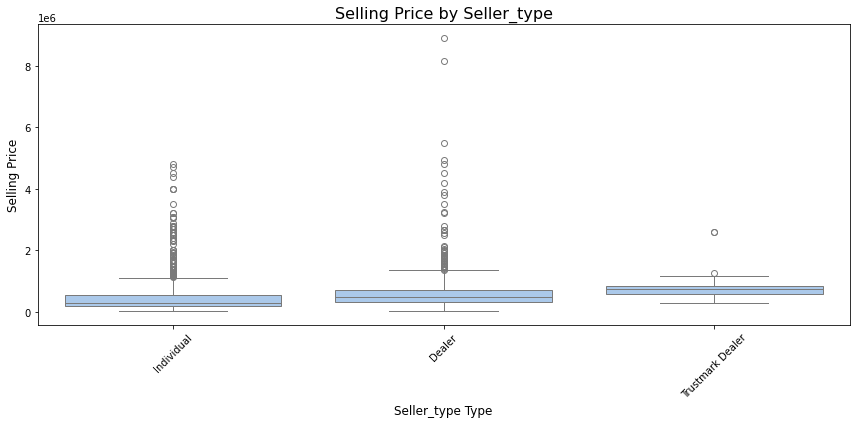

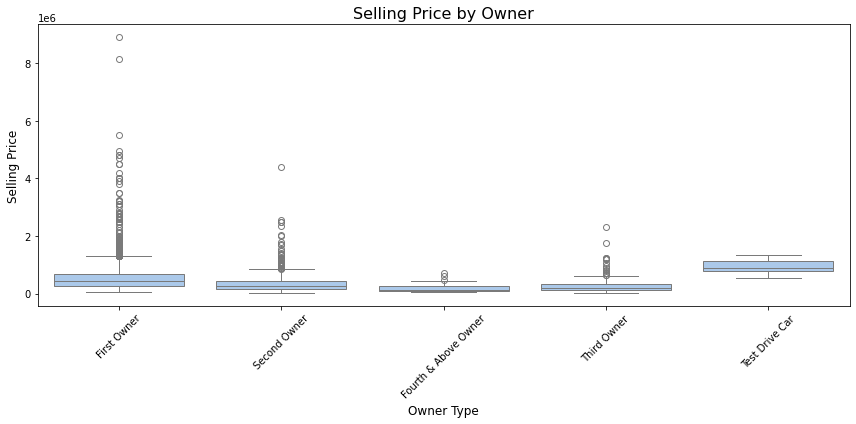

In [13]:
# Set a broader color palette
sns.set_palette("pastel")

# List of categorical variables to plot
categorical_vars = ['fuel', 'transmission', 'seller_type', 'owner']

# Create an outlier flag for each variable and combine them
cleaned_data_no_duplication_V1.loc[:, 'is_outlier'] = False
for var in categorical_vars:
    outlier_flags = flag_outliers(cleaned_data_no_duplication_V1, var, 'selling_price')
    cleaned_data_no_duplication_V1.loc[:, 'is_outlier'] |= outlier_flags

# Count total unique outliers
total_unique_outliers = cleaned_data_no_duplication_V1['is_outlier'].sum()
print(f"Total unique outliers across all categories: {total_unique_outliers}")

# Visualize continuous variables (histogram and boxplot)
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_data_no_duplication_V1['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.show()

# Create boxplots in a loop and show outliers
for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=var, y='selling_price', data=cleaned_data_no_duplication_V1, showfliers=True)  # Show outliers
    plt.title(f"Selling Price by {var.capitalize()}", fontsize=16)
    plt.xlabel(var.capitalize() + ' Type', fontsize=12)
    plt.ylabel('Selling Price', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [14]:
# Filter out the outliers
filtered_data_no_outliers_V2 = cleaned_data_no_duplication_V1[cleaned_data_no_duplication_V1['is_outlier'] == False]

# Save the filtered DataFrame ( without outliers) to a CSV file
filtered_data_no_outliers_V2.to_csv('filtered_data_no_outliers_V2.csv', index=False)

print("Filtered DataFrame without outliers has been saved to 'filtered_data_no_outliers_V2.csv'")

Filtered DataFrame without outliers has been saved to 'filtered_data_no_outliers_V2.csv'


In [15]:
print(f"Removed {len(cleaned_data_no_duplication_V1) - len(filtered_data_no_outliers_V2)} outliers from the dataset.")


Removed 277 outliers from the dataset.


In [16]:
filtered_data_no_outliers_V2 = filtered_data_no_outliers_V2.drop(columns=['is_outlier'])

filtered_data_no_outliers_V2


name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007        60000.0    70000.0   
1                Maruti Wagon R LXI Minor  2007       135000.0    50000.0   
2                    Hyundai Verna 1.6 SX  2012       600000.0   100000.0   
3                  Datsun RediGO T Option  2017       250000.0    46000.0   
4                   Honda Amaze VX i-DTEC  2014       450000.0   141000.0   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014       409999.0    80000.0   
4336           Hyundai i20 Magna 1.4 CRDi  2014       409999.0    80000.0   
4337                  Maruti 800 AC BSIII  2009       110000.0    83000.0   
4338     Hyundai Creta 1.6 CRDi SX Option  2016       865000.0    90000.0   
4339                     Renault KWID RXT  2016       225000.0    40000.0   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[3300 rows x 8 columns]

<span style="color: green; font-weight: bold;">**4. Inferential Statistics**</span>



In [17]:
print(filtered_data_no_outliers_V2['fuel'].unique())


['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


<span style="color: green; font-weight: bold;">**Inferential_Statistics_One-Way ANOVA**</span>


In [18]:

# Test whether selling prices differ across fuel categories
fuel_groups = [filtered_data_no_outliers_V2[filtered_data_no_outliers_V2['fuel'] == fuel]['selling_price'] for fuel in filtered_data_no_outliers_V2['fuel'].unique()]
anova_result = stats.f_oneway(*fuel_groups)

print(f"ANOVA Test Result: F-statistic={anova_result.statistic}, p-value={anova_result.pvalue}")


ANOVA Test Result: F-statistic=125.25077433573765, p-value=1.1631351869324348e-99


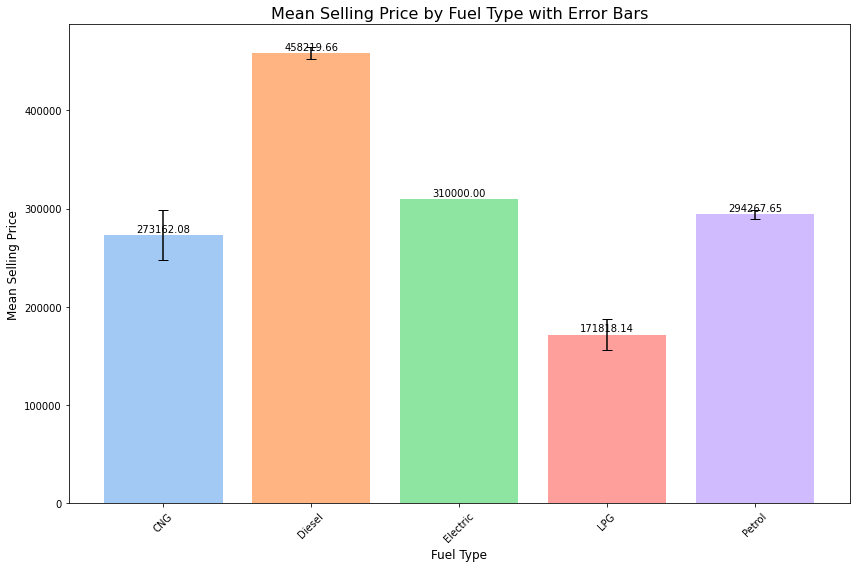

In [19]:
# Calculate mean and standard error for each fuel category
mean_prices = filtered_data_no_outliers_V2.groupby('fuel')['selling_price'].mean()
std_errors = filtered_data_no_outliers_V2.groupby('fuel')['selling_price'].sem()

# Create a bar plot with error bars
plt.figure(figsize=(12, 8))
bars = plt.bar(mean_prices.index, mean_prices.values, yerr=std_errors.values, capsize=5, color=sns.color_palette("pastel", n_colors=len(mean_prices)))
plt.title('Mean Selling Price by Fuel Type with Error Bars', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Mean Selling Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with significance results
for bar, fuel1 in zip(bars, mean_prices.index):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 1000, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

**Inferential_Statistics.Two-Way ANOVA**


**Two-Way ANOVA model**


In [20]:
# Assuming 'transmission' is the second factor
# Fit the Two-Way ANOVA model
Two_Way_ANOVA_MODEL = ols('selling_price ~ C(fuel) * C(transmission)', data=filtered_data_no_outliers_V2).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(Two_Way_ANOVA_MODEL, typ=2)

print(anova_table)

                               sum_sq      df          F        PR(>F)
C(fuel)                  6.276008e+12     4.0  35.828918  4.041876e-16
C(transmission)          3.011864e+11     1.0   6.877737  8.767811e-03
C(fuel):C(transmission)  7.284386e+11     4.0   4.158562  5.979240e-03
Residual                 1.442054e+14  3293.0        NaN           NaN


/home/ahmed-ferganey/.local/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/home/ahmed-ferganey/.local/lib/python3.10/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 3
  warnings.warn('covariance of constraints does not have full '


**Interpretation:** 

    - The p-value of C(fuel):- Fuel type has a significant effect on selling price.

    - The p-value of C(transmission):- Transmission type also has a significant effect on selling price.

    - The p-value of C(fuel):C(transmission):-  There is a significant interaction effect between fuel type and transmission type on selling price.


**Inferential_Statistics.Post-Hoc Tests**

**Tukey's HSD for fuel:**


In [21]:
# Perform Tukey's HSD test for fuel
fuel_comparison = MultiComparison(filtered_data_no_outliers_V2['selling_price'], filtered_data_no_outliers_V2['fuel'])
tukey_fuel = fuel_comparison.tukeyhsd()
print("Tukey's HSD for Fuel:")
print(tukey_fuel)

Tukey's HSD for Fuel:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
 group1   group2    meandiff   p-adj     lower        upper     reject
----------------------------------------------------------------------
     CNG   Diesel  185057.5767    0.0   87744.4674  282370.6861   True
     CNG Electric   36837.9189 0.9998   -556154.62  629830.4578  False
     CNG      LPG -101343.9447 0.3999 -258877.1451   56189.2557  False
     CNG   Petrol   21105.5729 0.9763  -76159.2373  118370.3831  False
  Diesel Electric -148219.6578 0.9585 -733542.3176   437103.002  False
  Diesel      LPG -286401.5215    0.0 -412016.7041 -160786.3388   True
  Diesel   Petrol -163952.0038    0.0 -184516.7353 -143387.2724   True
Electric      LPG -138181.8636 0.9702 -736470.6602  460106.9329  False
Electric   Petrol   -15732.346    1.0 -601046.9777  569582.2857  False
     LPG   Petrol  122449.5176 0.0601   -3128.2517   248027.287  False
-------------------------------------------------------

**Tukey's HSD for transmission:**


In [22]:
# Perform Tukey's HSD test for transmission
transmission_comparison = MultiComparison(filtered_data_no_outliers_V2['selling_price'], filtered_data_no_outliers_V2['transmission'])
tukey_transmission = transmission_comparison.tukeyhsd()
print("Tukey's HSD for Transmission:")
print(tukey_transmission)

Tukey's HSD for Transmission:
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1  group2   meandiff   p-adj    lower        upper    reject
-------------------------------------------------------------------
Automatic Manual -186620.0818   0.0 -221068.0166 -152172.147   True
-------------------------------------------------------------------


**Inferential_Statistics. Check Model Diagnostics**


**Variance Inflation Factor (VIF):**


    - To check for potential collinearity and other issues in the model, you can use Variance Inflation Factor (VIF) analysis and diagnostic plots.

In [23]:
# Assuming filtered_data_no_outliers_V2 is your DataFrame
# Prepare the features for VIF analysis
X = pd.get_dummies(filtered_data_no_outliers_V2[['fuel', 'transmission']], drop_first=True)

# Convert boolean columns to numeric (0 and 1)
X = X.astype(float)

# Add a constant term for VIF calculation
X = sm.add_constant(X)

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
X = X.dropna()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
               Feature         VIF
0                const  109.297974
1          fuel_Diesel   22.789815
2        fuel_Electric    1.032808
3             fuel_LPG    1.583964
4          fuel_Petrol   22.817365
5  transmission_Manual    1.009825


**VIF Interpretation:**

    - const (Constant Term): A VIF of 109.30 is quite high, but this is expected for the constant term as it's not a feature but an added term to the model.

    - fuel_Diesel: A VIF of 22.79 is relatively high, suggesting significant multicollinearity with other fuel types.

    - fuel_Electric: A VIF of 1.03 is very low, indicating minimal collinearity with other features.

    - fuel_LPG: A VIF of 1.58 is also low, meaning it does not contribute significantly to multicollinearity.

    - fuel_Petrol: A VIF of 22.82 is high, similar to fuel_Diesel, indicating it’s highly collinear with other fuel types.

    - transmission_Manual: A VIF of 1.01 is very low, suggesting minimal collinearity with other features.

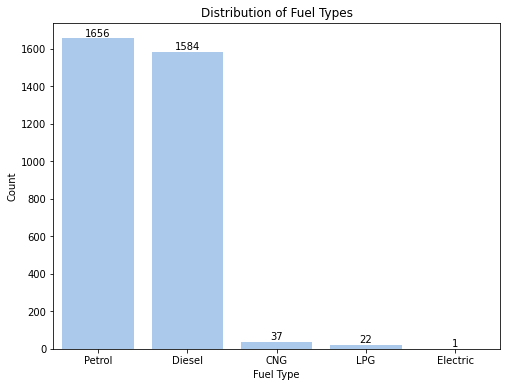

In [24]:
# Plot the distribution of fuel types
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=filtered_data_no_outliers_V2, x='fuel')

# Add labels for counts on top of each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = height
    ax.text(x, y, f'{int(height)}', ha='center', va='bottom')

plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [25]:
filtered_data_no_outliers_V2

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007        60000.0    70000.0   
1                Maruti Wagon R LXI Minor  2007       135000.0    50000.0   
2                    Hyundai Verna 1.6 SX  2012       600000.0   100000.0   
3                  Datsun RediGO T Option  2017       250000.0    46000.0   
4                   Honda Amaze VX i-DTEC  2014       450000.0   141000.0   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014       409999.0    80000.0   
4336           Hyundai i20 Magna 1.4 CRDi  2014       409999.0    80000.0   
4337                  Maruti 800 AC BSIII  2009       110000.0    83000.0   
4338     Hyundai Creta 1.6 CRDi SX Option  2016       865000.0    90000.0   
4339                     Renault KWID RXT  2016       225000.0    40000.0   

        fuel seller_type transmission         owner  
0     Petrol  Individual       Manual   First Owner  
1     Petrol  Individual       Manual   First Owner  
2     Diesel  Individual       Manual   First Owner  
3     Petrol  Individual       Manual   First Owner  
4     Diesel  Individual       Manual  Second Owner  
...      ...         ...          ...           ...  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner  

[3300 rows x 8 columns]

In [26]:
# feature engineering

current_year = 2024  # Update to the current year
filtered_data_no_outliers_V2['car_age'] = current_year - filtered_data_no_outliers_V2['year']
filtered_data_no_outliers_V2

name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007        60000.0    70000.0   
1                Maruti Wagon R LXI Minor  2007       135000.0    50000.0   
2                    Hyundai Verna 1.6 SX  2012       600000.0   100000.0   
3                  Datsun RediGO T Option  2017       250000.0    46000.0   
4                   Honda Amaze VX i-DTEC  2014       450000.0   141000.0   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014       409999.0    80000.0   
4336           Hyundai i20 Magna 1.4 CRDi  2014       409999.0    80000.0   
4337                  Maruti 800 AC BSIII  2009       110000.0    83000.0   
4338     Hyundai Creta 1.6 CRDi SX Option  2016       865000.0    90000.0   
4339                     Renault KWID RXT  2016       225000.0    40000.0   

        fuel seller_type transmission         owner  car_age  
0     Petrol  Individual       Manual   First Owner       17  
1     Petrol  Individual       Manual   First Owner       17  
2     Diesel  Individual       Manual   First Owner       12  
3     Petrol  Individual       Manual   First Owner        7  
4     Diesel  Individual       Manual  Second Owner       10  
...      ...         ...          ...           ...      ...  
4335  Diesel  Individual       Manual  Second Owner       10  
4336  Diesel  Individual       Manual  Second Owner       10  
4337  Petrol  Individual       Manual  Second Owner       15  
4338  Diesel  Individual       Manual   First Owner        8  
4339  Petrol  Individual       Manual   First Owner        8  

[3300 rows x 9 columns]

In [27]:
# Define log transformation function
def log_transform(x):
    return np.log1p(x)

# Create a copy of the original DataFrame
before_encoding_V3 = filtered_data_no_outliers_V2.copy()

# Apply log transformation to km_driven before scaling
before_encoding_V3['km_driven'] = np.log1p(before_encoding_V3['km_driven'])

# Define categorical and numerical columns
categorical_columns = ['fuel', 'transmission', 'owner', 'seller_type']
numerical_columns = ['km_driven', 'year', 'car_age']

# Apply log transformation before scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('log', FunctionTransformer(func=log_transform, validate=False)),
            ('scaler', StandardScaler())
        ]), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Define a pipeline with the preprocessor
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the pipeline to the data
after_encoding_V4 = pipeline.fit_transform(before_encoding_V3)

# Convert the transformed data back to a DataFrame
# Get feature names after one-hot encoding
feature_names = (
    numerical_columns +
    list(pipeline.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_columns))
)

after_encoding_V5_df = pd.DataFrame(after_encoding_V4, columns=feature_names)

# Display the DataFrame with encoded features
print(after_encoding_V5_df.head())

   km_driven      year   car_age  fuel_CNG  fuel_Diesel  fuel_Electric  \
0   0.284223 -1.343303  1.274158       0.0          0.0            0.0   
1  -0.051872 -1.343303  1.274158       0.0          0.0            0.0   
2   0.630490 -0.164088  0.330852       0.0          1.0            0.0   
3  -0.136639  1.012202 -1.076495       0.0          0.0            0.0   
4   0.954845  0.306778 -0.153389       0.0          1.0            0.0   

   fuel_LPG  fuel_Petrol  transmission_Automatic  transmission_Manual  \
0       0.0          1.0                     0.0                  1.0   
1       0.0          1.0                     0.0                  1.0   
2       0.0          0.0                     0.0                  1.0   
3       0.0          1.0                     0.0                  1.0   
4       0.0          0.0                     0.0                  1.0   

   owner_First Owner  owner_Fourth & Above Owner  owner_Second Owner  \
0                1.0                        

In [28]:
# Inspect the transformed data
print(after_encoding_V5_df.describe())

# Check for NaNs
print(after_encoding_V5_df.isna().sum())

          km_driven          year       car_age     fuel_CNG  fuel_Diesel  \
count  3.300000e+03  3.300000e+03  3.300000e+03  3300.000000  3300.000000   
mean   2.054114e-15 -1.647641e-13  2.196223e-16     0.011212     0.480000   
std    1.000152e+00  1.000152e+00  1.000152e+00     0.105308     0.499676   
min   -2.331958e+01 -4.898647e+00 -2.438900e+00     0.000000     0.000000   
25%   -2.800825e-01 -6.354220e-01 -7.350761e-01     0.000000     0.000000   
50%    2.062034e-01  7.140369e-02  9.883151e-02     0.000000     0.000000   
75%    5.292416e-01  7.771773e-01  7.456605e-01     0.000000     1.000000   
max    2.478059e+00  1.716578e+00  3.031172e+00     1.000000     1.000000   

       fuel_Electric     fuel_LPG  fuel_Petrol  transmission_Automatic  \
count    3300.000000  3300.000000  3300.000000             3300.000000   
mean        0.000303     0.006667     0.501818                0.053030   
std         0.017408     0.081389     0.500072                0.224128   
min       

In [29]:
# Add 'selling_price' to the encoded DataFrame for plotting
after_encoding_V5_df['selling_price'] = filtered_data_no_outliers_V2['selling_price'].values


In [30]:
after_encoding_V5_df

km_driven      year   car_age  fuel_CNG  fuel_Diesel  fuel_Electric  \
0      0.284223 -1.343303  1.274158       0.0          0.0            0.0   
1     -0.051872 -1.343303  1.274158       0.0          0.0            0.0   
2      0.630490 -0.164088  0.330852       0.0          1.0            0.0   
3     -0.136639  1.012202 -1.076495       0.0          0.0            0.0   
4      0.954845  0.306778 -0.153389       0.0          1.0            0.0   
...         ...       ...       ...       ...          ...            ...   
3295   0.415033  0.306778 -0.153389       0.0          1.0            0.0   
3296   0.415033  0.306778 -0.153389       0.0          1.0            0.0   
3297   0.450847 -0.871265  0.932739       0.0          0.0            0.0   
3298   0.529242  0.777177 -0.735076       0.0          1.0            0.0   
3299  -0.280083  0.777177 -0.735076       0.0          0.0            0.0   

      fuel_LPG  fuel_Petrol  transmission_Automatic  transmission_Manual  \
0          0.0          1.0                     0.0                  1.0   
1          0.0          1.0                     0.0                  1.0   
2          0.0          0.0                     0.0                  1.0   
3          0.0          1.0                     0.0                  1.0   
4          0.0          0.0                     0.0                  1.0   
...        ...          ...                     ...                  ...   
3295       0.0          0.0                     0.0                  1.0   
3296       0.0          0.0                     0.0                  1.0   
3297       0.0          1.0                     0.0                  1.0   
3298       0.0          0.0                     0.0                  1.0   
3299       0.0          1.0                     0.0                  1.0   

      owner_First Owner  owner_Fourth & Above Owner  owner_Second Owner  \
0                   1.0                         0.0                 0.0   
1                   1.0                         0.0                 0.0   
2                   1.0                         0.0                 0.0   
3                   1.0                         0.0                 0.0   
4                   0.0                         0.0                 1.0   
...                 ...                         ...                 ...   
3295                0.0                         0.0                 1.0   
3296                0.0                         0.0                 1.0   
3297                0.0                         0.0                 1.0   
3298                1.0                         0.0                 0.0   
3299                1.0                         0.0                 0.0   

      owner_Test Drive Car  owner_Third Owner  seller_type_Dealer  \
0                      0.0                0.0                 0.0   
1                      0.0                0.0                 0.0   
2                      0.0                0.0                 0.0   
3                      0.0                0.0                 0.0   
4                      0.0                0.0                 0.0   
...                    ...                ...                 ...   
3295                   0.0                0.0                 0.0   
3296                   0.0                0.0                 0.0   
3297                   0.0                0.0                 0.0   
3298                   0.0                0.0                 0.0   
3299                   0.0                0.0                 0.0   

      seller_type_Individual  seller_type_Trustmark Dealer  selling_price  
0                        1.0                           0.0        60000.0  
1                        1.0                           0.0       135000.0  
2                        1.0                           0.0       600000.0  
3                        1.0                           0.0       250000.0  
4                        1.0                           0.0

In [31]:
# List of features to plot against 'selling_price'
features_after_encoding_V5 = [features_after_encoding_V5 for features_after_encoding_V5 in feature_names if features_after_encoding_V5 not in numerical_columns + ['selling_price']]
features_after_encoding_V5

['fuel_CNG',
 'fuel_Diesel',
 'fuel_Electric',
 'fuel_LPG',
 'fuel_Petrol',
 'transmission_Automatic',
 'transmission_Manual',
 'owner_First Owner',
 'owner_Fourth & Above Owner',
 'owner_Second Owner',
 'owner_Test Drive Car',
 'owner_Third Owner',
 'seller_type_Dealer',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer']

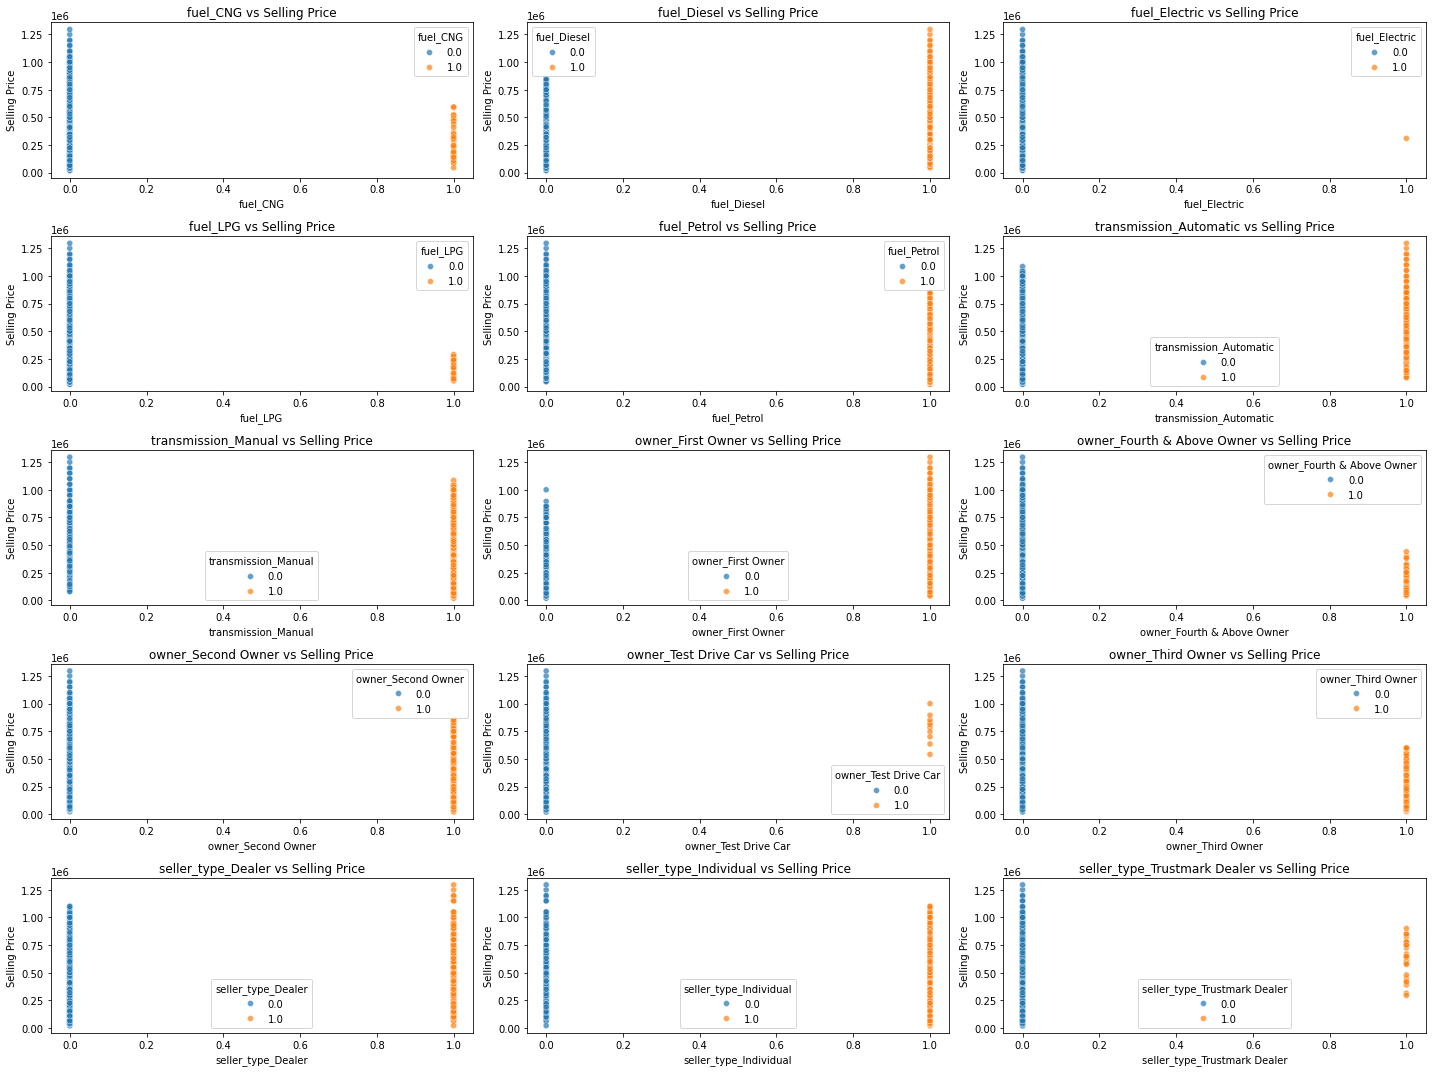

In [32]:
# Adjust the figure size
plt.figure(figsize=(20, 15))

# Number of features to plot
num_features = len(features_after_encoding_V5)
rows = (num_features + 2) // 3  # Calculate the number of rows needed

for i, feature in enumerate(features_after_encoding_V5):
    plt.subplot(rows, 3, i + 1)
    
    # Plot the data with a different color for each feature value
    sns.scatterplot(data=after_encoding_V5_df, x=after_encoding_V5_df[feature], y='selling_price', hue=feature, palette='tab10', alpha=0.7)
    plt.title(f'{feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

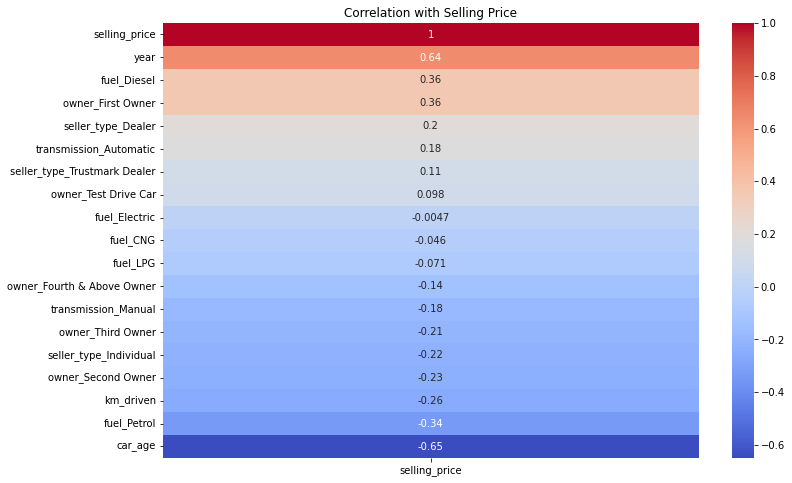

Correlation with Selling Price:
                              selling_price
selling_price                      1.000000
year                               0.640292
fuel_Diesel                        0.360604
owner_First Owner                  0.359569
seller_type_Dealer                 0.201239
transmission_Automatic             0.181875
seller_type_Trustmark Dealer       0.105453
owner_Test Drive Car               0.097700
fuel_Electric                     -0.004688
fuel_CNG                          -0.045733
fuel_LPG                          -0.071291
owner_Fourth & Above Owner        -0.135016
transmission_Manual               -0.181875
owner_Third Owner                 -0.207116
seller_type_Individual            -0.221902
owner_Second Owner                -0.231391
km_driven                         -0.256521
fuel_Petrol                       -0.338921
car_age                           -0.649043


In [33]:
# Compute correlation matrix
correlation_matrix = after_encoding_V5_df.corr()

# Plot heatmap of correlations with 'selling_price'
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['selling_price']].sort_values(by='selling_price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Selling Price')
plt.show()


# Extract correlations with 'selling_price'
correlations_with_selling_price = correlation_matrix[['selling_price']].sort_values(by='selling_price', ascending=False)

# Print correlation values
print("Correlation with Selling Price:")
print(correlations_with_selling_price)

In [34]:
# Perform ANOVA for each categorical feature
for feature in features_after_encoding_V5:
    groups = [after_encoding_V5_df[after_encoding_V5_df[feature] == value]['selling_price'] 
              for value in after_encoding_V5_df[feature].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f'Feature: {feature}, p-value: {p_value}')

    """ 
Features with high p-values (e.g., fuel_Electric) do not show a significant effect on selling_price.
    """

Feature: fuel_CNG, p-value: 0.008599961110397422
Feature: fuel_Diesel, p-value: 6.654247981625994e-102
Feature: fuel_Electric, p-value: 0.7877667753126277
Feature: fuel_LPG, p-value: 4.1490171942607204e-05
Feature: fuel_Petrol, p-value: 1.6922616754521702e-89
Feature: transmission_Automatic, p-value: 6.156770821540221e-26
Feature: transmission_Manual, p-value: 6.156770821540221e-26
Feature: owner_First Owner, p-value: 2.7401482504963145e-101
Feature: owner_Fourth & Above Owner, p-value: 6.76280495039944e-15
Feature: owner_Second Owner, p-value: 2.330210631120494e-41
Feature: owner_Test Drive Car, p-value: 1.8680984008409716e-08
Feature: owner_Third Owner, p-value: 2.6579604262965992e-33
Feature: seller_type_Dealer, p-value: 1.6991971404249291e-31
Feature: seller_type_Individual, p-value: 4.292039144840924e-38
Feature: seller_type_Trustmark Dealer, p-value: 1.2595834774816715e-09


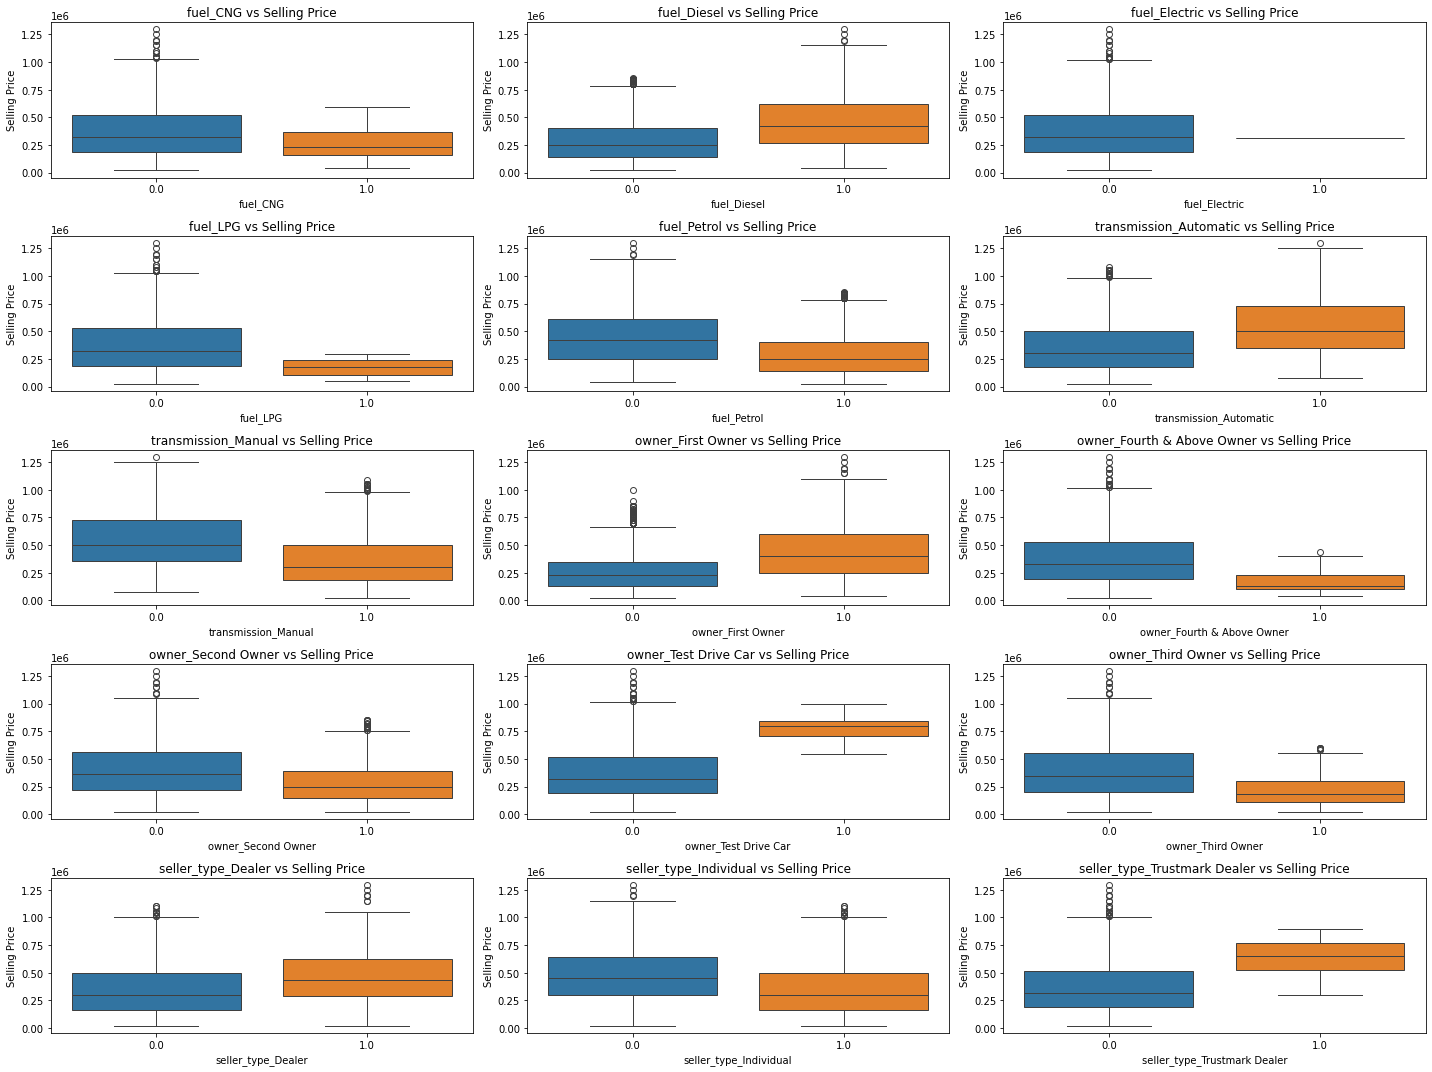

In [35]:
#For each one-hot encoded feature, perform pairwise comparisons of selling_price between the presence (1) and absence (0) of that feature.
plt.figure(figsize=(20, 15))
num_features = len(features_after_encoding_V5)
rows = (num_features + 2) // 3

for i, feature in enumerate(features_after_encoding_V5):
    plt.subplot(rows, 3, i + 1)
    
    # Create box plots with updated syntax to avoid FutureWarnings
    sns.boxplot(data=after_encoding_V5_df, x=feature, y='selling_price', hue=feature, palette='tab10', legend=False)
    plt.title(f'{feature} vs Selling Price')
    plt.xlabel(feature)
    plt.ylabel('Selling Price')

plt.tight_layout()
plt.show()

**Summary**

**Features with Stronger Correlations:** 

        year shows a moderate positive correlation with selling_price (0.64), suggesting that newer vehicles tend to have higher selling prices. km_driven shows a weak negative correlation (-0.22) with selling_price, indicating that higher mileage might slightly reduce the price.

**Categorical Features:** 
    
        Both fuel and transmission have weak correlations with selling_price. This implies that variations in fuel types and transmission types have a limited effect on the selling price when considered in isolation.
        
**<span style="color:red">The correlation analysis</span>** provides a basic understanding of how individual features relate to selling price linearly.
The **<span style="color:red">Two-Way ANOVA</span>** reveals more detailed insights into how categorical features and their interactions affect selling price.


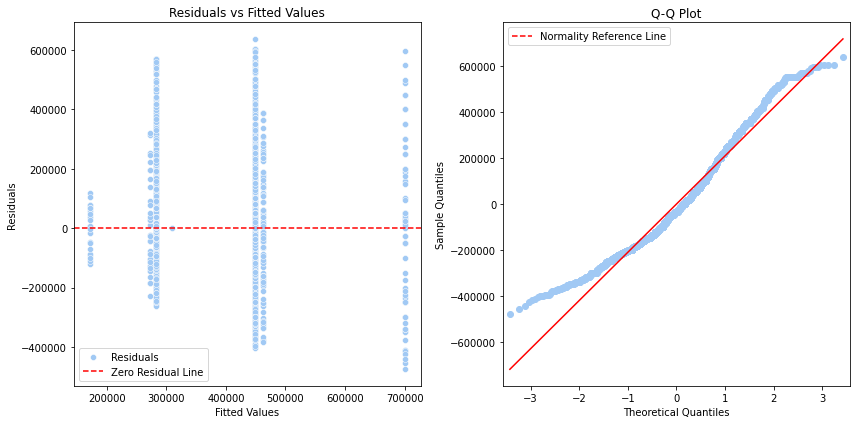

In [36]:
# Plot residuals vs fitted values "Diagnostic plots"
fitted_values = Two_Way_ANOVA_MODEL.fittedvalues
residuals = Two_Way_ANOVA_MODEL.resid

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals, label='Residuals')  # Scatter plot of fitted values vs residuals (blue points)
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')  # Scatter plot of fitted values vs residuals (blue points))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')  # Title of the plot
plt.legend()  # Show legend to label blue points and red line

# Plot Q-Q plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.plot([], [], 'r--', label='Normality Reference Line')  # Add a red dashed line as the normality reference line
plt.title('Q-Q Plot')  # Title of the Q-Q plot
plt.legend()  # Show legend to label the blue points and the red reference line

plt.tight_layout()
plt.show()

**Conclusion:**

    The Residuals vs Fitted Values plot suggests potential heteroscedasticity, which means the error variance may not be constant across all predicted values.

    The Q-Q Plot shows deviations from normality, especially in the tails, indicating possible outliers or that the residuals do not perfectly follow a normal distribution.

**The diagnostic plots** 

    (Residuals vs. Fitted Values and Q-Q Plot) are helpful for visual inspection. 

    Residuals vs. Fitted Values: Residuals should be randomly scattered around zero, without any discernible pattern.

    Q-Q Plot: Residuals should approximately follow a straight line if they are normally distributed.

**In summary:**

    Centered around zero: The residuals being centered around zero indicates the model predictions are unbiased 'no under-fitting or over-fitting'. 

    Varying spread (heteroscedasticity): The increasing spread of residuals for larger fitted values may suggest heteroscedasticity, which could be an issue that should be addressed.

    No clear non-linear pattern: The lack of a clear pattern indicates that there are no obvious systematic errors (like non-linear relationships) that the model is failing to capture.

In [37]:
# Print first few fitted values and residuals
print("Fitted Values:")
print(fitted_values.head())

print("\nResiduals:")
print(residuals.head())

# Optional: Print statistical summary of residuals
print("\nResiduals Summary Statistics:")
print(residuals.describe())

Fitted Values:
0    282293.168823
1    282293.168823
2    448026.275000
3    282293.168823
4    448026.275000
dtype: float64

Residuals:
0   -222293.168823
1   -147293.168823
2    151973.725000
3    -32293.168823
4      1973.725000
dtype: float64

Residuals Summary Statistics:
count    3.300000e+03
mean     6.022553e-10
std      2.090738e+05
min     -4.753125e+05
25%     -1.622932e+05
50%     -3.229317e+04
75%      1.321570e+05
max      6.369737e+05
dtype: float64


    the predicted values from your model. You can observe that the fitted values are relatively consistent, which may be a result of the model's structure or the data itself.

    Residuals represent the difference between the observed values and the fitted values. Large residuals indicate a significant deviation of the model's predictions from the actual values.

# **Solution:**

**1. Addressing Heteroscedasticity:**

Transformations: Apply transformations (like log transformation) to the dependent variable to stabilize variance.

Robust Standard Errors: Use robust standard errors that can handle heteroscedasticity.

**2. Normality of Residuals:**

Transformation: If residuals deviate significantly from normality, consider applying transformations to the dependent variable or adding polynomial terms to the model.

Alternative Models: In some cases, using models that do not assume normality of residuals (like generalized linear models) may be appropriate.

**3. Consider Alternative Models:**

Tree-Based Methods: Random Forests or Gradient Boosting can be useful if the residuals indicate a non-linear relationship.

Generalized Linear Models: If heteroscedasticity is a major concern, GLMs might provide a better fit.





**1. Addressing Heteroscedasticity:**



**2. Normality of Residuals:**



**3. Consider Alternative Models:**

In [38]:
""" 

Confidence Interval for Mean Selling Price
    Compute a 95% confidence interval for the mean selling price:

"""
# Mean and standard error of selling price
mean_price = after_encoding_V5_df['selling_price'].mean()
std_error = stats.sem(after_encoding_V5_df['selling_price'])

# Confidence interval
confidence_interval = stats.t.interval(0.95, len(after_encoding_V5_df['selling_price'])-1, loc=mean_price, scale=std_error)
print(f"95% Confidence Interval for Mean Selling Price: {confidence_interval}")


95% Confidence Interval for Mean Selling Price: (364067.09910564893, 379765.7305913208)


<span style="color: orange; font-weight: bold;">**5. Feature Seletion and Extraction**</span>

In [39]:
after_encoding_V5_df

km_driven      year   car_age  fuel_CNG  fuel_Diesel  fuel_Electric  \
0      0.284223 -1.343303  1.274158       0.0          0.0            0.0   
1     -0.051872 -1.343303  1.274158       0.0          0.0            0.0   
2      0.630490 -0.164088  0.330852       0.0          1.0            0.0   
3     -0.136639  1.012202 -1.076495       0.0          0.0            0.0   
4      0.954845  0.306778 -0.153389       0.0          1.0            0.0   
...         ...       ...       ...       ...          ...            ...   
3295   0.415033  0.306778 -0.153389       0.0          1.0            0.0   
3296   0.415033  0.306778 -0.153389       0.0          1.0            0.0   
3297   0.450847 -0.871265  0.932739       0.0          0.0            0.0   
3298   0.529242  0.777177 -0.735076       0.0          1.0            0.0   
3299  -0.280083  0.777177 -0.735076       0.0          0.0            0.0   

      fuel_LPG  fuel_Petrol  transmission_Automatic  transmission_Manual  \
0          0.0          1.0                     0.0                  1.0   
1          0.0          1.0                     0.0                  1.0   
2          0.0          0.0                     0.0                  1.0   
3          0.0          1.0                     0.0                  1.0   
4          0.0          0.0                     0.0                  1.0   
...        ...          ...                     ...                  ...   
3295       0.0          0.0                     0.0                  1.0   
3296       0.0          0.0                     0.0                  1.0   
3297       0.0          1.0                     0.0                  1.0   
3298       0.0          0.0                     0.0                  1.0   
3299       0.0          1.0                     0.0                  1.0   

      owner_First Owner  owner_Fourth & Above Owner  owner_Second Owner  \
0                   1.0                         0.0                 0.0   
1                   1.0                         0.0                 0.0   
2                   1.0                         0.0                 0.0   
3                   1.0                         0.0                 0.0   
4                   0.0                         0.0                 1.0   
...                 ...                         ...                 ...   
3295                0.0                         0.0                 1.0   
3296                0.0                         0.0                 1.0   
3297                0.0                         0.0                 1.0   
3298                1.0                         0.0                 0.0   
3299                1.0                         0.0                 0.0   

      owner_Test Drive Car  owner_Third Owner  seller_type_Dealer  \
0                      0.0                0.0                 0.0   
1                      0.0                0.0                 0.0   
2                      0.0                0.0                 0.0   
3                      0.0                0.0                 0.0   
4                      0.0                0.0                 0.0   
...                    ...                ...                 ...   
3295                   0.0                0.0                 0.0   
3296                   0.0                0.0                 0.0   
3297                   0.0                0.0                 0.0   
3298                   0.0                0.0                 0.0   
3299                   0.0                0.0                 0.0   

      seller_type_Individual  seller_type_Trustmark Dealer  selling_price  
0                        1.0                           0.0        60000.0  
1                        1.0                           0.0       135000.0  
2                        1.0                           0.0       600000.0  
3                        1.0                           0.0       250000.0  
4                        1.0                           0.0

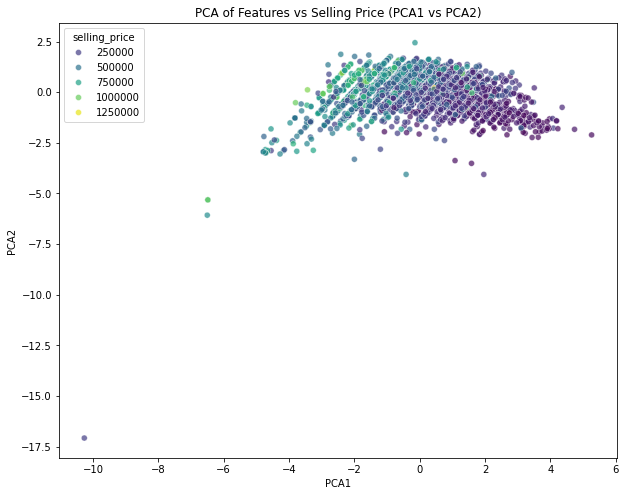

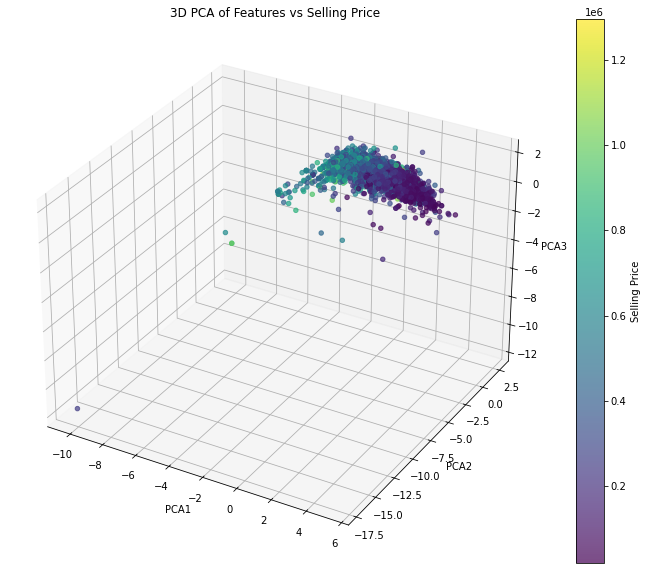

Number of components selected: 3
Explained variance ratio: 0.7971467390241097


In [40]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
X = after_encoding_V5_df.drop(columns=['selling_price'])
X_pca = pca.fit_transform(X)

# Create DataFrame with PCA components and selling_price
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['selling_price'] = after_encoding_V5_df['selling_price']

# Plot PCA results for 2D visualization (PCA1 vs PCA2)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='selling_price', palette='viridis', alpha=0.7)
plt.title('PCA of Features vs Selling Price (PCA1 vs PCA2)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Plot PCA results for 3D visualization (PCA1, PCA2, PCA3)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c=pca_df['selling_price'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Selling Price')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA of Features vs Selling Price')
plt.show()

# Print the number of components and the amount of variance explained
print(f'Number of components selected: {X_pca.shape[1]}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_.sum()}')

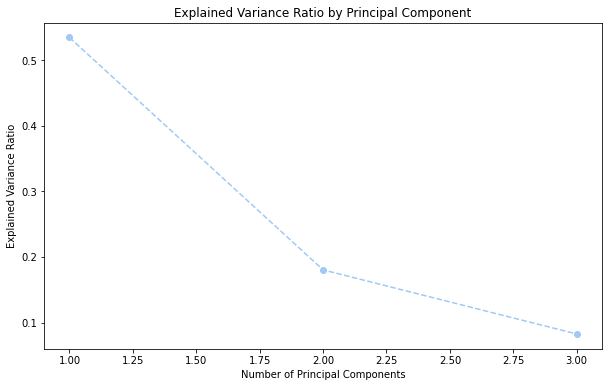

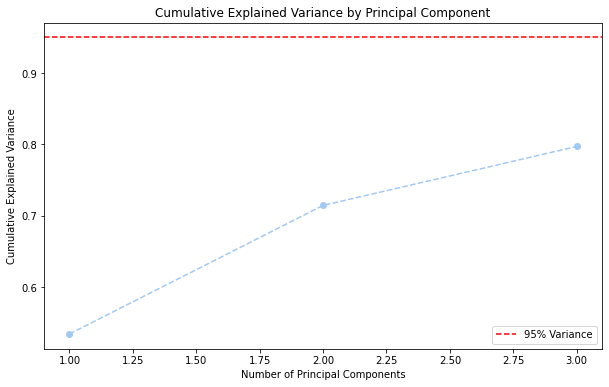

PCA Component Loadings:
     km_driven      year   car_age  fuel_CNG  fuel_Diesel  fuel_Electric  \
PC1   0.436302 -0.611961  0.626181 -0.000812     0.007501       0.000254   
PC2   0.753107  0.311819 -0.217640  0.001175     0.377484      -0.000276   
PC3   0.459395  0.091837 -0.074771 -0.001003    -0.537867      -0.000322   

     fuel_LPG  fuel_Petrol  transmission_Automatic  transmission_Manual  \
PC1  0.002803    -0.009747               -0.012957             0.012957   
PC2 -0.000018    -0.378365               -0.013572             0.013572   
PC3 -0.000634     0.539826                0.022438            -0.022438   

     owner_First Owner  owner_Fourth & Above Owner  owner_Second Owner  \
PC1          -0.159515                    0.015705            0.103144   
PC2           0.041698                   -0.008703           -0.014118   
PC3           0.313437                   -0.003162           -0.279458   

     owner_Test Drive Car  owner_Third Owner  seller_type_Dealer  \
PC1  

In [41]:
# Optionally: Plot the explained variance ratio of each component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Optionally: Plot cumulative explained variance
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), 
         explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Component')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

# Print PCA component loadings for all principal components
components_df = pd.DataFrame(pca.components_, columns=X.columns, 
                              index=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print('PCA Component Loadings:')
print(components_df)

In [71]:
components_df

km_driven      year   car_age  fuel_CNG  fuel_Diesel  fuel_Electric  \
PC1   0.436302 -0.611961  0.626181 -0.000812     0.007501       0.000254   
PC2   0.753107  0.311819 -0.217640  0.001175     0.377484      -0.000276   
PC3   0.459395  0.091837 -0.074771 -0.001003    -0.537867      -0.000322   

     fuel_LPG  fuel_Petrol  transmission_Automatic  transmission_Manual  \
PC1  0.002803    -0.009747               -0.012957             0.012957   
PC2 -0.000018    -0.378365               -0.013572             0.013572   
PC3 -0.000634     0.539826                0.022438            -0.022438   

     owner_First Owner  owner_Fourth & Above Owner  owner_Second Owner  \
PC1          -0.159515                    0.015705            0.103144   
PC2           0.041698                   -0.008703           -0.014118   
PC3           0.313437                   -0.003162           -0.279458   

     owner_Test Drive Car  owner_Third Owner  seller_type_Dealer  \
PC1             -0.006004           0.046670           -0.042541   
PC2             -0.011698          -0.007179           -0.001708   
PC3             -0.016526          -0.014291            0.087038   

     seller_type_Individual  seller_type_Trustmark Dealer  
PC1                0.046637                     -0.004096  
PC2                0.001867                     -0.000159  
PC3               -0.093622                      0.006584

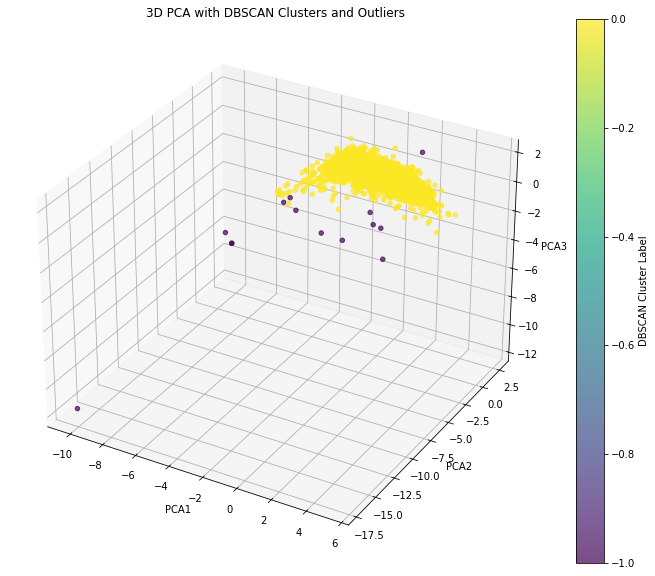

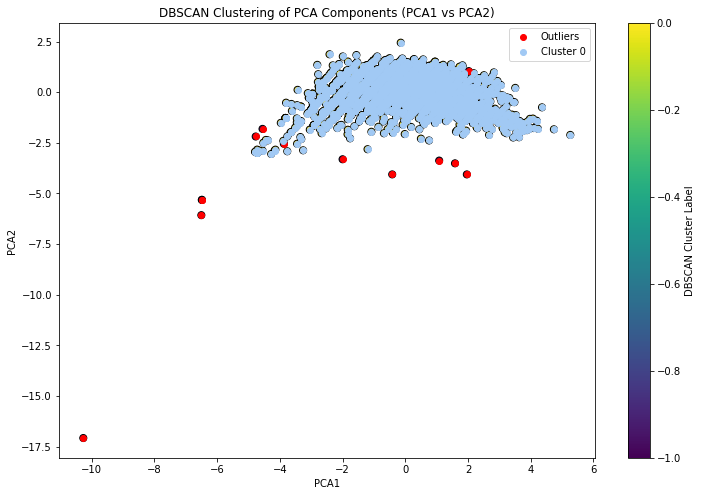

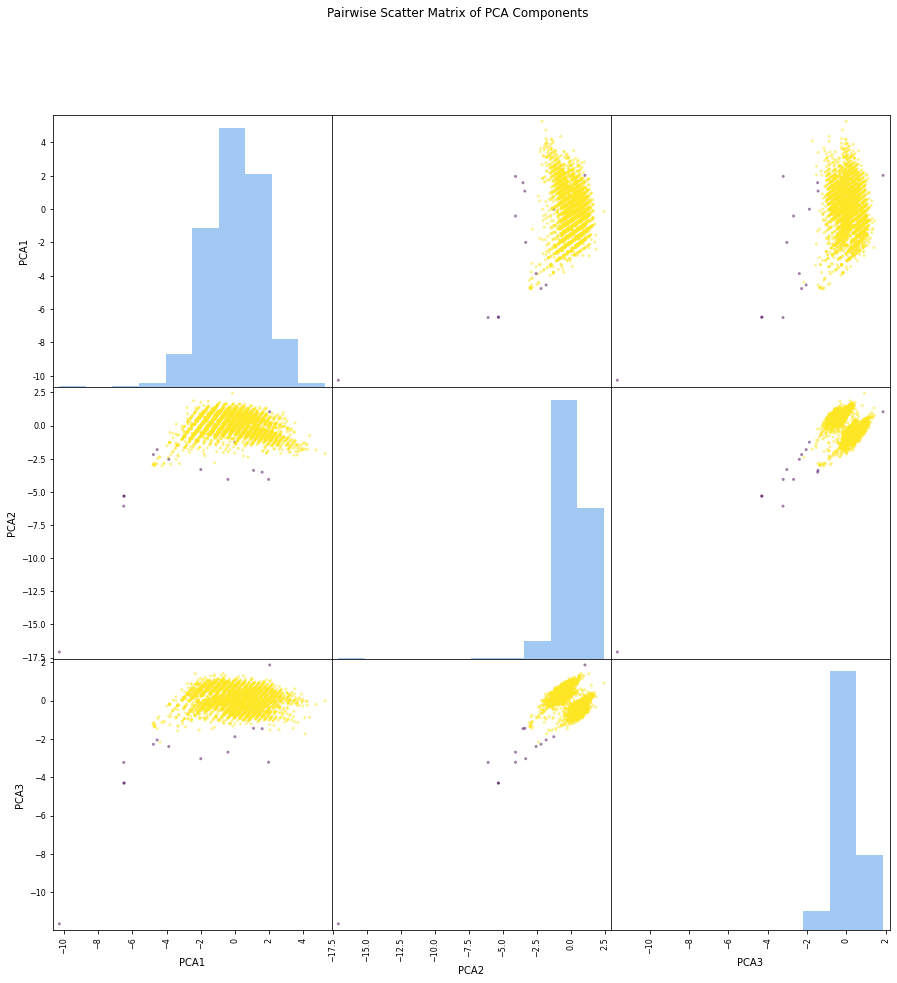

In [42]:
# Apply DBSCAN to the PCA components
dbscan = DBSCAN(eps=1, min_samples=10)  # Adjust eps and min_samples based on your data
dbscan_labels = dbscan.fit_predict(X_pca)

# Add the DBSCAN labels to the PCA DataFrame
pca_df['DBSCAN_Label'] = dbscan_labels

# Plot 3D PCA results and DBSCAN clusters with outliers highlighted
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c=pca_df['DBSCAN_Label'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='DBSCAN Cluster Label')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA with DBSCAN Clusters and Outliers')
plt.show()

# Plot DBSCAN clusters and outliers using the first two principal components
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['DBSCAN_Label'], cmap='viridis', edgecolor='k', s=50)
plt.colorbar(scatter, label='DBSCAN Cluster Label')

# Add labels for clusters and outliers
unique_labels = np.unique(dbscan_labels)
for label in unique_labels:
    if label != -1:  # Exclude outliers
        plt.scatter(pca_df[pca_df['DBSCAN_Label'] == label]['PCA1'],
                    pca_df[pca_df['DBSCAN_Label'] == label]['PCA2'],
                    label=f'Cluster {label}')
    else:
        plt.scatter(pca_df[pca_df['DBSCAN_Label'] == label]['PCA1'],
                    pca_df[pca_df['DBSCAN_Label'] == label]['PCA2'],
                    label='Outliers', color='red')

plt.title('DBSCAN Clustering of PCA Components (PCA1 vs PCA2)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.show()

# Scatter matrix to visualize pairwise relationships
scatter_matrix(pca_df[['PCA1', 'PCA2', 'PCA3']], c=pca_df['DBSCAN_Label'], cmap='viridis', figsize=(15, 15))
plt.suptitle('Pairwise Scatter Matrix of PCA Components')
plt.show()

In [43]:
# Identify and print outliers
outliers = pca_df[pca_df['DBSCAN_Label'] == -1]
print(f"Number of outliers: {len(outliers)}")

# 1. Remove outliers using DBSCAN labels
non_outliers_df = pca_df[pca_df['DBSCAN_Label'] != -1]  # Filter out outliers (DBSCAN label -1)
cleaned_data_PCA_V6 = after_encoding_V5_df[~after_encoding_V5_df.index.isin(outliers.index)]  # Raw data without outliers


Number of outliers: 14


In [44]:
# 2. Prepare features and target
X_cleaned = cleaned_data_PCA_V6.drop(columns=['selling_price'])  # Adjust columns as necessary
y_cleaned = cleaned_data_PCA_V6['selling_price']

# 3. Standardize the features
scaler = StandardScaler()
X_cleaned_scaled = scaler.fit_transform(X_cleaned)

# 4. Apply PCA to cleaned, standardized data
pca = PCA(n_components=0.80)  # Retain components that explain 80% of the variance
X_cleaned_pca = pca.fit_transform(X_cleaned_scaled)

# 5. Print the number of components and explained variance ratio for verification
print(f'Number of components selected after cleaning: {X_cleaned_pca.shape[1]}')
print(f'Explained variance ratio after cleaning: {pca.explained_variance_ratio_.sum()}')


Number of components selected after cleaning: 9
Explained variance ratio after cleaning: 0.8216411482539968


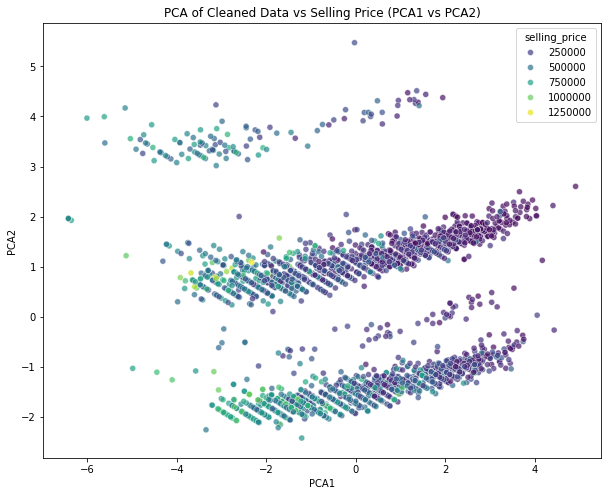

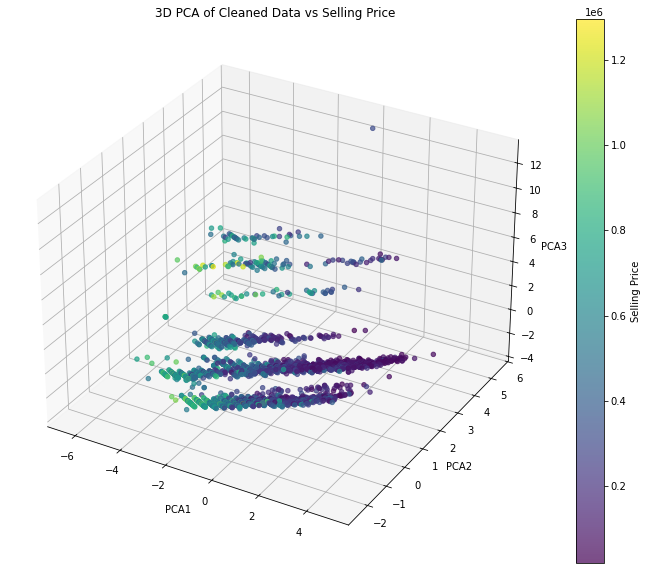

In [45]:
# 6. (Optional) Visualize the PCA results (2D and 3D plots)
# Plot PCA results for 2D visualization (PCA1 vs PCA2)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_cleaned_pca[:, 0], y=X_cleaned_pca[:, 1], hue=y_cleaned, palette='viridis', alpha=0.7)
plt.title('PCA of Cleaned Data vs Selling Price (PCA1 vs PCA2)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Plot PCA results for 3D visualization (PCA1, PCA2, PCA3)
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_cleaned_pca[:, 0], X_cleaned_pca[:, 1], X_cleaned_pca[:, 2], 
                c=y_cleaned, cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Selling Price')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D PCA of Cleaned Data vs Selling Price')
plt.show()

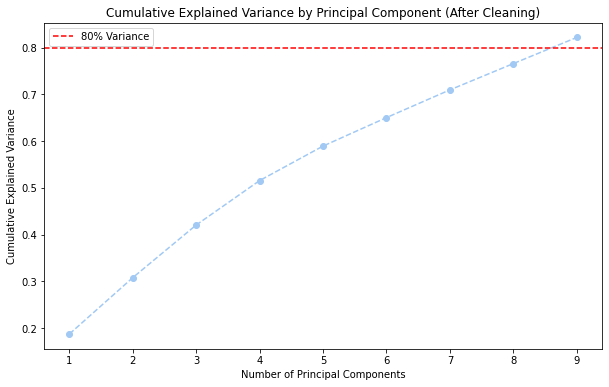

In [46]:
# 7. (Optional) Plot cumulative explained variance
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Component (After Cleaning)')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance')
plt.legend()
plt.show()

In [47]:
# # Try different numbers of PCA components
# pca_component_numbers = [2, 4, 6, 9, 10]
# for n_components in pca_component_numbers:
#     pca = PCA(n_components=n_components)
#     X_pca = pca.fit_transform(X_cleaned_scaled)
#     model = LinearRegression()
#     scores = cross_val_score(model, X_pca, y_cleaned, cv=5)
#     print(f'Number of PCA components: {n_components}, Mean Cross-Validation Score: {scores.mean()}')

""" 

Number of PCA components: 2,  Mean Cross-Validation Score: 0.4623721553511137
Number of PCA components: 4,  Mean Cross-Validation Score: 0.5312977151028073
Number of PCA components: 6,  Mean Cross-Validation Score: 0.5454377296371944
Number of PCA components: 9,  Mean Cross-Validation Score: 0.5476191053668341
Number of PCA components: 10, Mean Cross-Validation Score: 0.543922277306278


"""

' \n\nNumber of PCA components: 2,  Mean Cross-Validation Score: 0.4623721553511137\nNumber of PCA components: 4,  Mean Cross-Validation Score: 0.5312977151028073\nNumber of PCA components: 6,  Mean Cross-Validation Score: 0.5454377296371944\nNumber of PCA components: 9,  Mean Cross-Validation Score: 0.5476191053668341\nNumber of PCA components: 10, Mean Cross-Validation Score: 0.543922277306278\n\n\n'

Let's break down the benefits and relevance of evaluating a linear regression model with PCA components, especially when you're planning to use clustering and classification next.

## Benefits of Evaluating a Linear Regression Model with PCA Components

### 1. Dimensionality Reduction Impact:
- **Purpose:** PCA reduces the number of features in your dataset by creating principal components that capture the most variance. Evaluating a regression model with these components helps you understand how well the reduced feature set explains the target variable.
- **Benefit:** It verifies whether the principal components retain enough information for predicting the target variable (e.g., selling price). If the model performs well, it suggests that the reduced dimensionality still captures significant relationships between features and the target.

### 2. Model Performance Insight:
- **Purpose:** Using `cross_val_score` with the R² metric helps assess the model's performance across different subsets of the data. It measures how well the model predicts the target variable compared to the mean of the target.
- **Benefit:** Cross-validation provides a robust estimate of the model's performance and helps in understanding its generalization capability. A high R² score indicates that the model explains a substantial portion of the variance in the target variable.

### 3. Visualization of Predictions:
- **Purpose:** The scatter plot of true vs. predicted values shows how accurately the model's predictions align with the actual values.
- **Benefit:** This visualization helps in diagnosing the model's performance. Points close to the red dashed line (which represents perfect predictions) indicate that the model is making accurate predictions. Discrepancies may highlight areas where the model needs improvement.

## Relevance to Clustering and Classification

Even though your immediate next steps involve clustering and classification, evaluating regression models with PCA components has the following implications:

### 1. Understanding Feature Importance:
- **Purpose:** Regression analysis with PCA components provides insight into the importance of different features or principal components.
- **Benefit:** This understanding can inform feature selection or weighting strategies for clustering and classification, ensuring that the most relevant features are considered.

### 2. Data Quality and Preparation:
- **Purpose:** Evaluating regression models ensures that the dimensionality reduction process (PCA) is effective and that the data quality is maintained.
- **Benefit:** High-quality, well-prepared data leads to better performance in clustering and classification tasks. If PCA components are effective for regression, it is likely they will also be useful for other tasks.

### 3. Baseline Comparison:
- **Purpose:** By evaluating a regression model, you establish a baseline performance with PCA components.
- **Benefit:** This baseline can be used to compare with the performance of clustering and classification models. If the regression model shows satisfactory performance with PCA, it sets a benchmark for how well other models should perform.

## Summary

Evaluating a linear regression model with PCA components provides a comprehensive view of how well the reduced features explain the target variable. It offers insights into feature importance, model performance, and data quality. This understanding can guide the application of clustering and classification techniques, ensuring that dimensionality reduction effectively supports subsequent analysis steps.


Cross-validated R^2 scores: [0.57018734 0.56854808 0.55332555 0.49431923 0.55171533]
Mean R^2 score: 0.5476191053668341


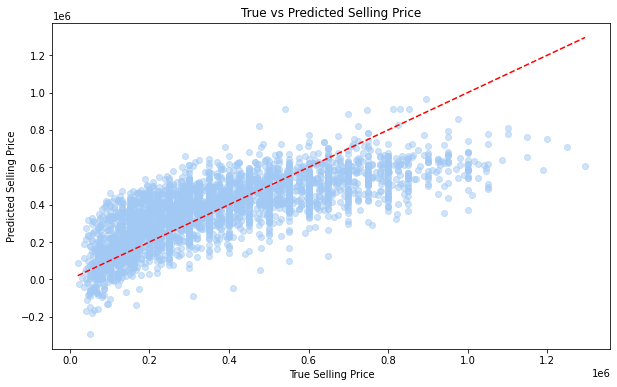

In [48]:
 # Train and evaluate the model with PCA components

# Initialize the model
model = LinearRegression()

# Fit the model with PCA components
model.fit(X_cleaned_pca, y_cleaned)

# Evaluate the model
scores = cross_val_score(model, X_cleaned_pca, y_cleaned, cv=5, scoring='r2')  # R^2 as scoring metric
print(f'Cross-validated R^2 scores: {scores}')
print(f'Mean R^2 score: {scores.mean()}')

# Visualize model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_cleaned, model.predict(X_cleaned_pca), alpha=0.5)
plt.xlabel('True Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('True vs Predicted Selling Price')
plt.plot([min(y_cleaned), max(y_cleaned)], [min(y_cleaned), max(y_cleaned)], color='red', linestyle='--')
plt.show()

**Interpretation and Suggestions**

**Explained Variance Ratio:**

    - Current Output: 65.39% of the variance in the dataset is explained by the 2 principal components.

    - Suggestion: While 65.39% is a good start, it indicates that there is still 34.61% of the variance unexplained by these two components. If this is sufficient for your analysis or modeling purposes, then 2 components might be adequate. However, if you need more comprehensive coverage of variance, consider including more principal components.


**Explained Variance by Additional Components:**

    - If you haven’t already, examine how adding more principal components affects the explained variance. Look at the cumulative explained variance plot to decide if additional components are necessary to reach a desired variance threshold (e.g., 90% or 95%).


**Dimensionality Reduction:**

    - Current Output: You’ve reduced the dataset to 2 dimensions, which is often sufficient for visualization and preliminary analysis.

    - Suggestion: For model building, assess whether retaining more components might improve performance. You could use cross-validation to evaluate if adding more components enhances model accuracy or stability.


**Visualization Insights:**

    - PCA Plot: The scatter plot of PCA components against selling price provides a visual understanding of how well the PCA components differentiate between different selling prices.

    - Suggestion: Analyze the scatter plot for patterns or clusters. If distinct patterns emerge, they might inform feature engineering or further analysis.









**Avoid Overfitting:**

The drop in score with 12 components suggests overfitting. When too many components are used, the model may start to capture noise rather than the underlying signal.

**Optimal Number of Components:**

Based on the cross-validation scores, 9 components provide the best trade-off between model complexity and performance. This number captures a substantial amount of variance while maintaining predictive power.

In [49]:
# Assuming X_cleaned_pca is the PCA-transformed features and y_cleaned is the target variable
# Convert PCA components to a DataFrame
pca_df_V7 = pd.DataFrame(X_cleaned_pca, columns=[f'PC{i+1}' for i in range(X_cleaned_pca.shape[1])])

# Optionally, add the target variable if you want to keep it in the DataFrame
pca_df_V7['SellingPrice'] = y_cleaned.values

# Save the DataFrame to a CSV file for further use
pca_df_V7.to_csv('pca_clustering_data_V7.csv', index=False)

# Display the first few rows of the DataFrame
pca_df_V7.head()


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.891914  1.251560 -0.691599 -0.627786 -1.274357 -0.542617 -0.339701   
1  0.750942  1.331289 -0.780240 -0.609598 -1.206409 -0.485651 -0.298993   
2  0.344088 -1.542355  0.016712  0.522073 -0.884872 -0.289614 -0.117100   
3 -1.340021  0.631491 -1.613659  0.433543 -0.267093 -0.210466 -0.173373   
4  1.549465 -1.401281  0.339371  0.841328  1.582963 -0.142673 -0.284221   

        PC8       PC9  SellingPrice  
0 -0.265876 -0.246082       60000.0  
1 -0.266834 -0.232066      135000.0  
2 -0.148675 -0.122367      600000.0  
3 -0.149668 -0.180600      250000.0  
4  0.149224 -0.059200      450000.0

<span style="color: purple; font-weight: bold;">**Clustering**</span>

In [50]:
pca_df_V7

""" 

X_cleaned_pca
y_cleaned
     
"""

' \n\nX_cleaned_pca\ny_cleaned\n     \n'

In [69]:
pca_df_V7.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.891914  1.251560 -0.691599 -0.627786 -1.274357 -0.542617 -0.339701   
1  0.750942  1.331289 -0.780240 -0.609598 -1.206409 -0.485651 -0.298993   
2  0.344088 -1.542355  0.016712  0.522073 -0.884872 -0.289614 -0.117100   
3 -1.340021  0.631491 -1.613659  0.433543 -0.267093 -0.210466 -0.173373   
4  1.549465 -1.401281  0.339371  0.841328  1.582963 -0.142673 -0.284221   

        PC8       PC9  SellingPrice  
0 -0.265876 -0.246082       60000.0  
1 -0.266834 -0.232066      135000.0  
2 -0.148675 -0.122367      600000.0  
3 -0.149668 -0.180600      250000.0  
4  0.149224 -0.059200      450000.0

In [52]:
# Function to plot K-Means clustering
def plot_kmeans_clusters(X_pca, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
    plt.colorbar(scatter, label='K-Means Cluster Label')
    plt.title(f'K-Means Clustering with {n_clusters} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    return kmeans_labels

# Function to plot DBSCAN clustering
def plot_dbscan_clusters(X_pca, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X_pca)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k', s=50)
    plt.colorbar(scatter, label='DBSCAN Cluster Label')
    plt.title(f'DBSCAN Clustering with eps={eps}, min_samples={min_samples}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    return dbscan_labels

# Function to plot GMM clustering
def plot_gmm_clusters(X_pca, n_components):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm_labels = gmm.fit_predict(X_pca)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
    plt.colorbar(scatter, label='GMM Cluster Label')
    plt.title(f'GMM Clustering with {n_components} Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    return gmm_labels

# Function to plot Hierarchical clustering
def plot_hierarchical_clusters(X_pca, n_clusters, linkage_method='ward'):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    hierarchical_labels = hierarchical.fit_predict(X_pca)
    
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', edgecolor='k', s=50)
    plt.colorbar(scatter, label='Hierarchical Cluster Label')
    plt.title(f'Hierarchical Clustering with {n_clusters} Clusters (Linkage: {linkage_method})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    return hierarchical_labels

# Function to plot Elbow Method and Silhouette Score
def plot_elbow_method(X_pca, max_clusters):
    sse = []
    silhouette_scores = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_pca)
        sse.append(kmeans.inertia_)
        if k > 1:
            silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_clusters + 1), sse, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    
    plt.show()

# Function to plot Dendrogram
def plot_dendrogram(X_pca, method='ward'):
    plt.figure(figsize=(12, 8))
    linkage_matrix = sch.linkage(X_pca, method=method)
    sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=50)
    plt.title(f'Dendrogram (Linkage Method: {method})')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Function to plot BIC and AIC for GMM
def plot_gmm_bic_aic(X_pca, max_components):
    bic = []
    aic = []
    for n in range(1, max_components + 1):
        gmm = GaussianMixture(n_components=n, random_state=42)
        gmm.fit(X_pca)
        bic.append(gmm.bic(X_pca))
        aic.append(gmm.aic(X_pca))
    
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_components + 1), bic, marker='o')
    plt.title('BIC for GMM')
    plt.xlabel('Number of Components')
    plt.ylabel('BIC')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, max_components + 1), aic, marker='o')
    plt.title('AIC for GMM')
    plt.xlabel('Number of Components')
    plt.ylabel('AIC')
    
    plt.show()

# Function to compute clustering metrics
def calculate_clustering_metrics(X_pca, labels):
    db_index = davies_bouldin_score(X_pca, labels)
    ch_index = calinski_harabasz_score(X_pca, labels)
    silhouette_avg = silhouette_score(X_pca, labels) if len(set(labels)) > 1 else np.nan
    return db_index, ch_index, silhouette_avg

# Function to evaluate clustering
def evaluate_clustering(X_pca, labels, method_name):
    if labels is not None:
        db_index, ch_index, silhouette_avg = calculate_clustering_metrics(X_pca, labels)
        print(f"{method_name} - Davies-Bouldin Index: {db_index}, Calinski-Harabasz Index: {ch_index}, Silhouette Score: {silhouette_avg}")
    else:
        print(f"{method_name} - Clustering labels are None. Skipping evaluation.")

# Function to optimize DBSCAN
def optimize_dbscan(data, eps_values, min_samples_values):
    best_eps = None
    best_min_samples = None
    best_score = -1
    best_model = None

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan_model.fit_predict(data)

            # Filter out noise points (-1) for silhouette scoring
            if len(np.unique(clusters)) > 1:
                score = silhouette_score(data, clusters)
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_model = dbscan_model

    print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best silhouette score: {best_score}")
    return best_model


Processing K-Means with 2 clusters:


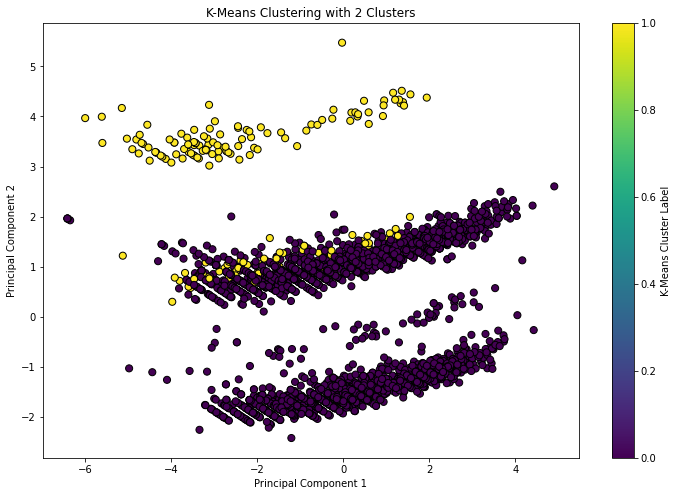


Processing K-Means with 3 clusters:


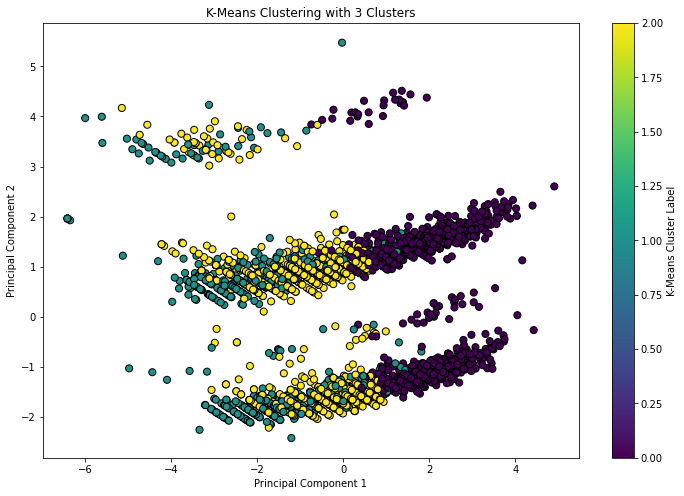


Processing K-Means with 4 clusters:


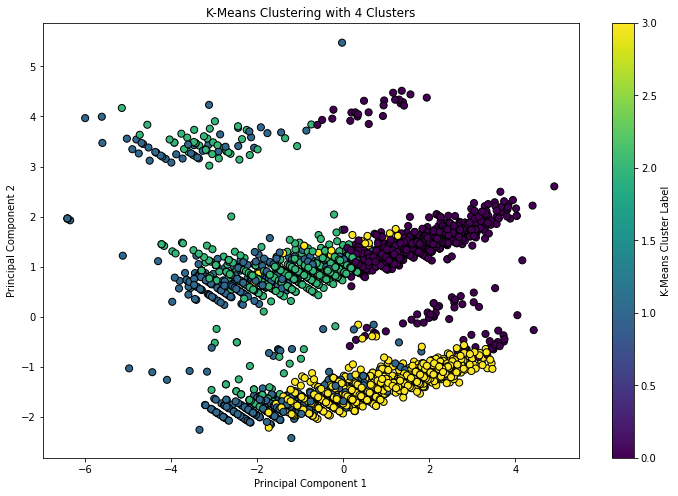


Processing K-Means with 5 clusters:


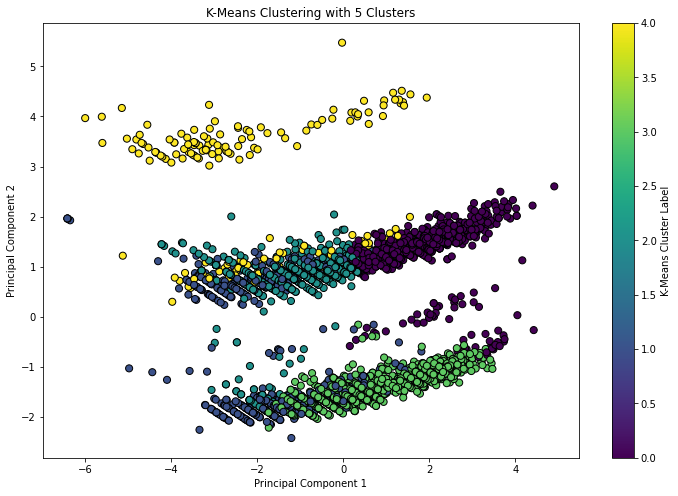


Processing Hierarchical Clustering with 2 clusters and linkage method 'ward':


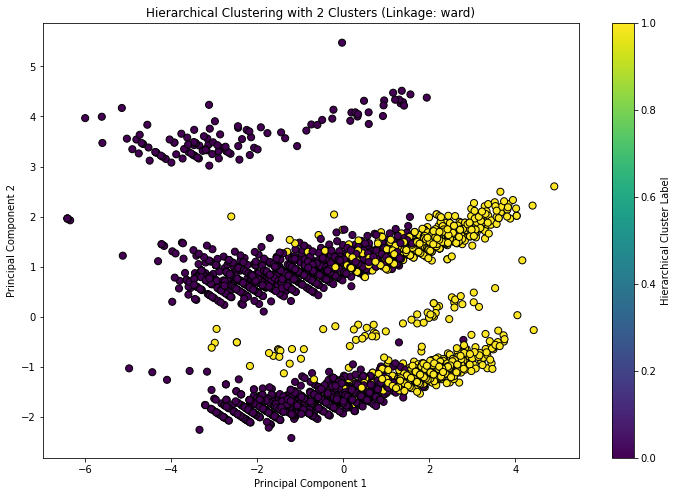


Processing Hierarchical Clustering with 2 clusters and linkage method 'complete':


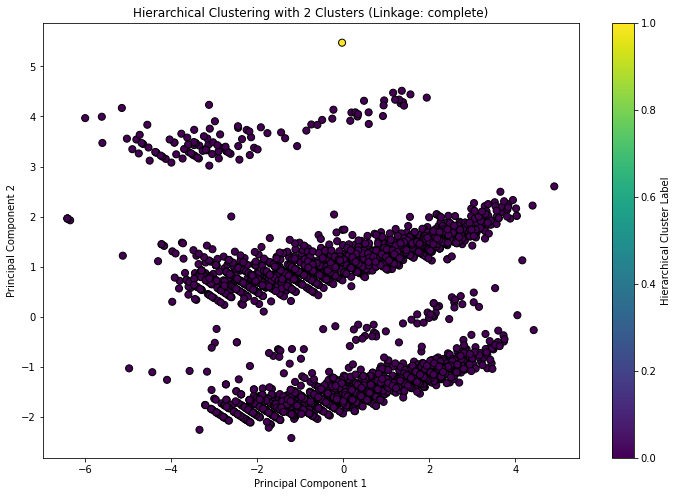


Processing Hierarchical Clustering with 2 clusters and linkage method 'average':


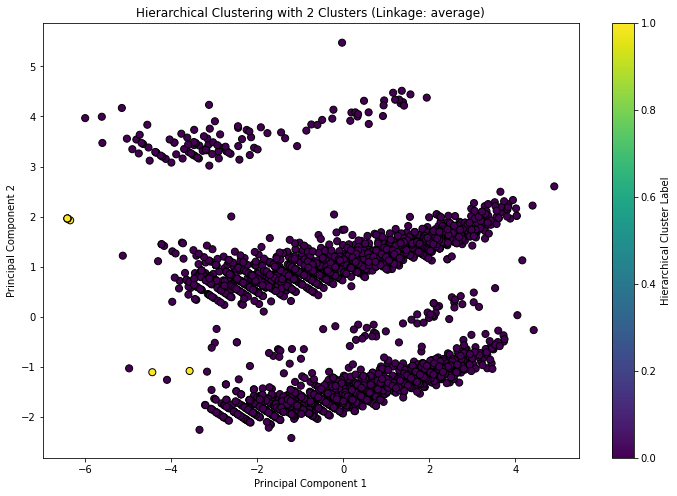


Processing Hierarchical Clustering with 2 clusters and linkage method 'single':


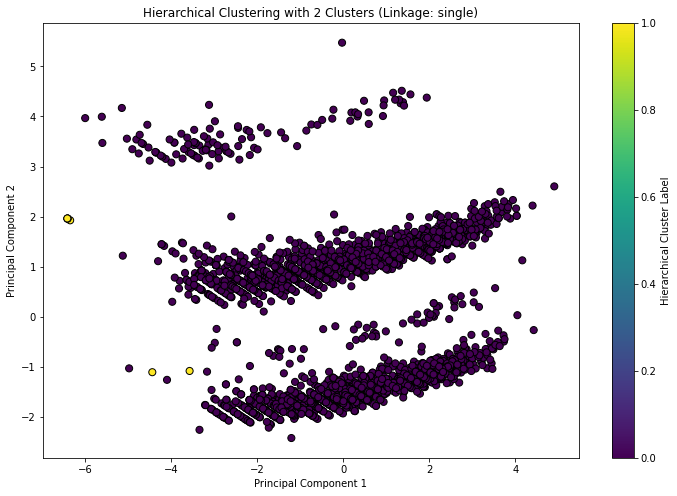


Processing Hierarchical Clustering with 3 clusters and linkage method 'ward':


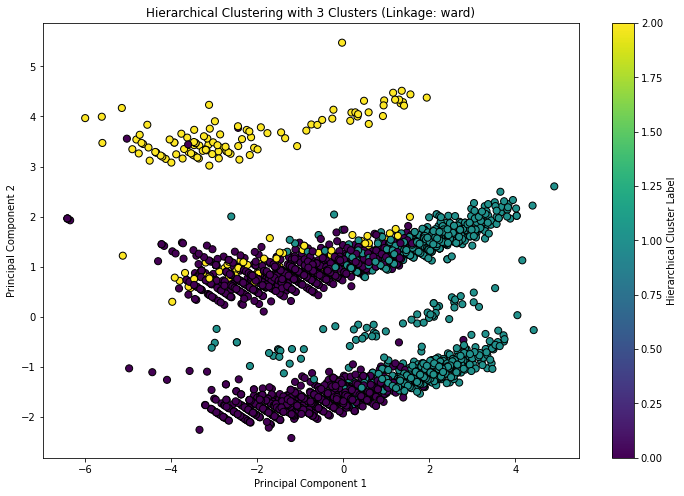


Processing Hierarchical Clustering with 3 clusters and linkage method 'complete':


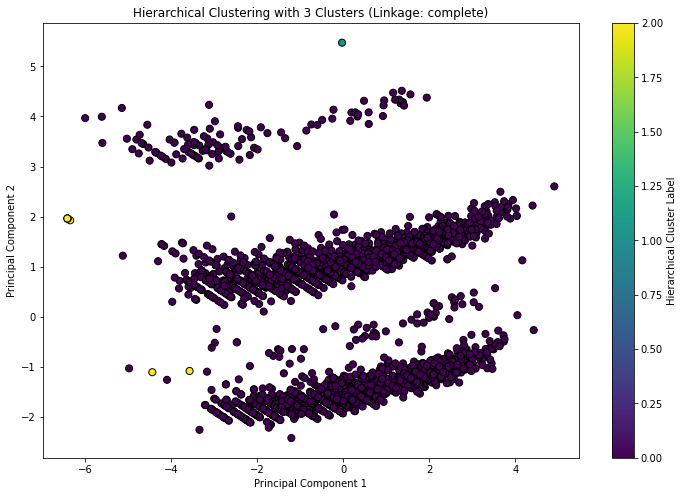


Processing Hierarchical Clustering with 3 clusters and linkage method 'average':


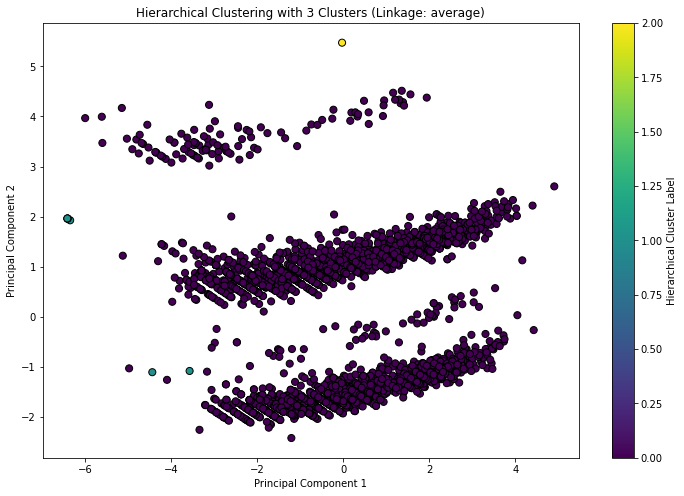


Processing Hierarchical Clustering with 3 clusters and linkage method 'single':


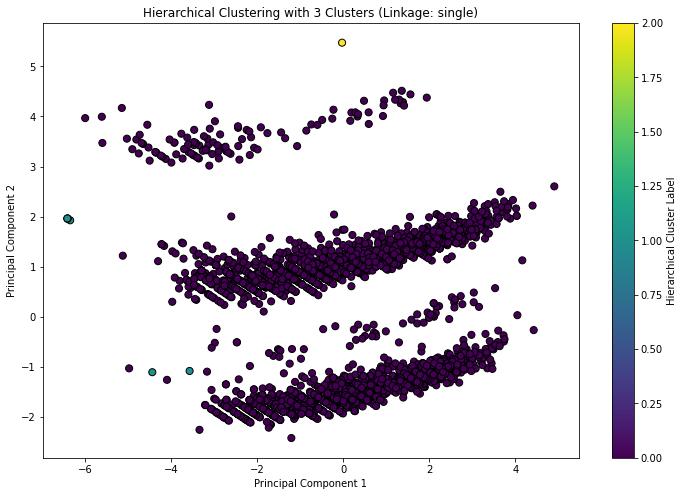


Processing Hierarchical Clustering with 4 clusters and linkage method 'ward':


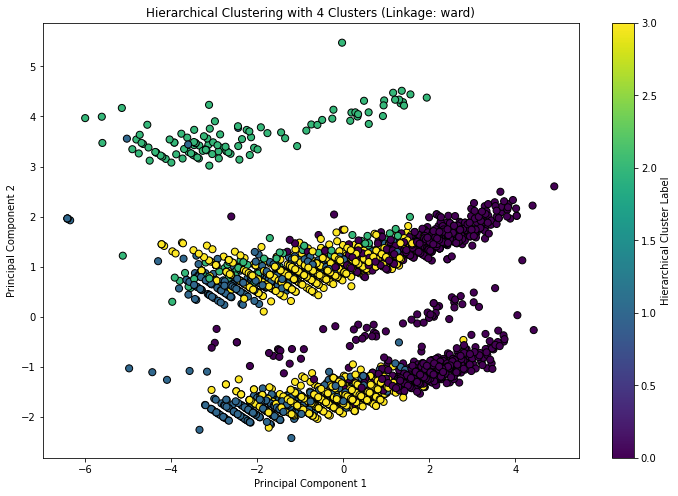


Processing Hierarchical Clustering with 4 clusters and linkage method 'complete':


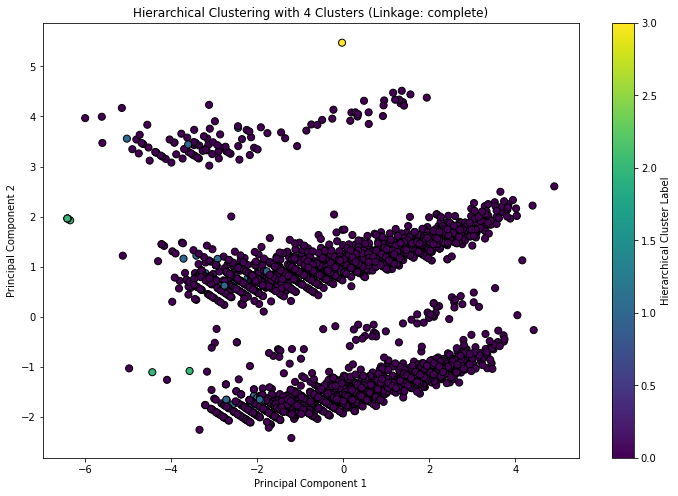


Processing Hierarchical Clustering with 4 clusters and linkage method 'average':


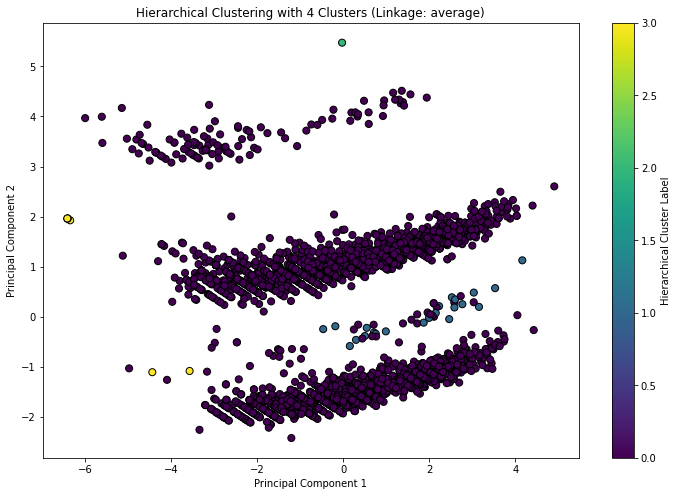


Processing Hierarchical Clustering with 4 clusters and linkage method 'single':


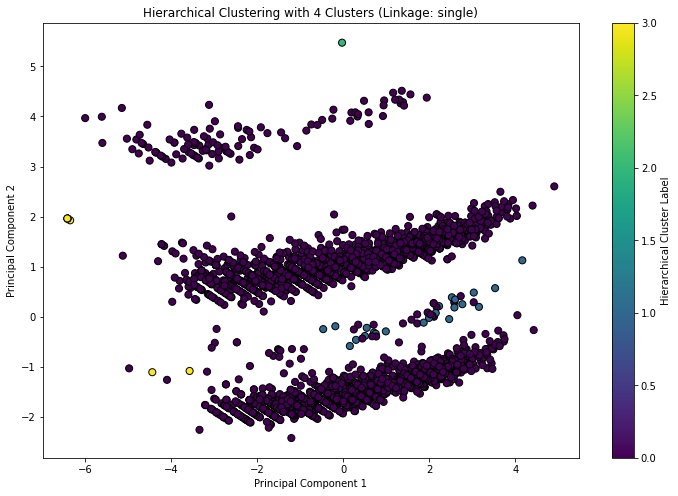


Processing Hierarchical Clustering with 5 clusters and linkage method 'ward':


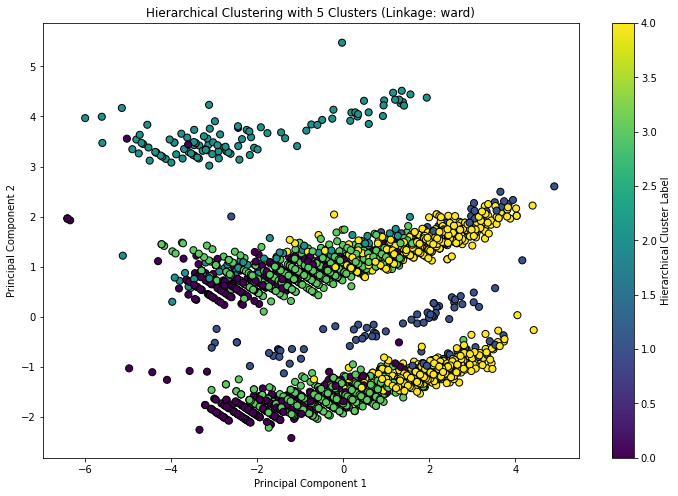


Processing Hierarchical Clustering with 5 clusters and linkage method 'complete':


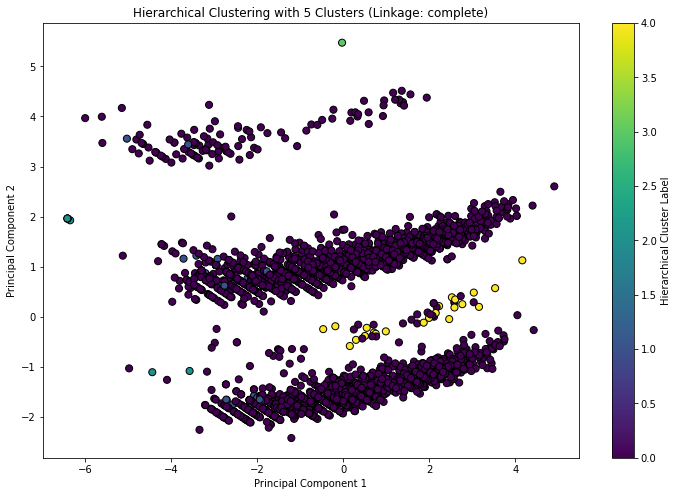


Processing Hierarchical Clustering with 5 clusters and linkage method 'average':


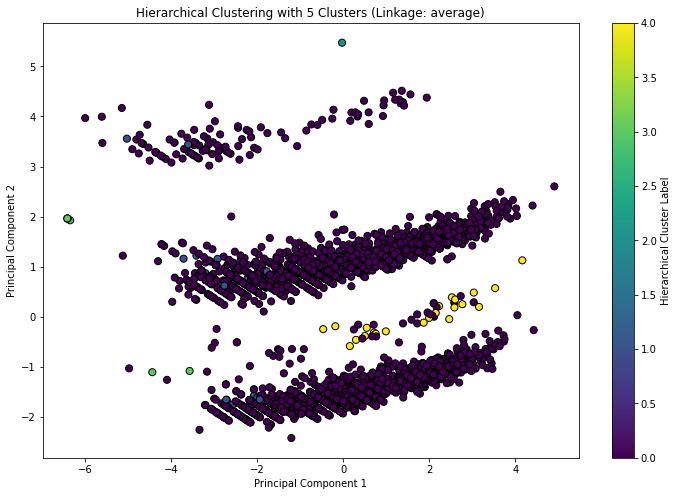


Processing Hierarchical Clustering with 5 clusters and linkage method 'single':


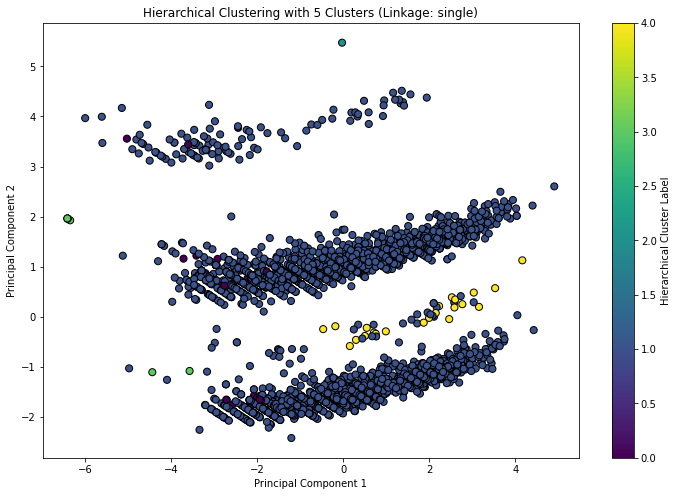


Processing GMM with 2 components:


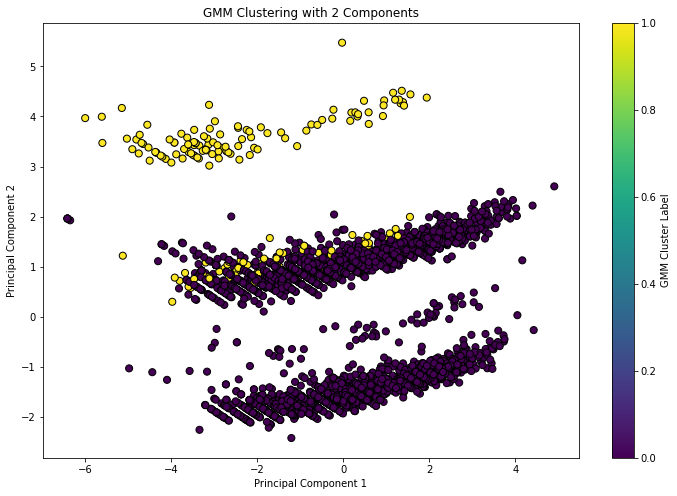


Processing GMM with 3 components:


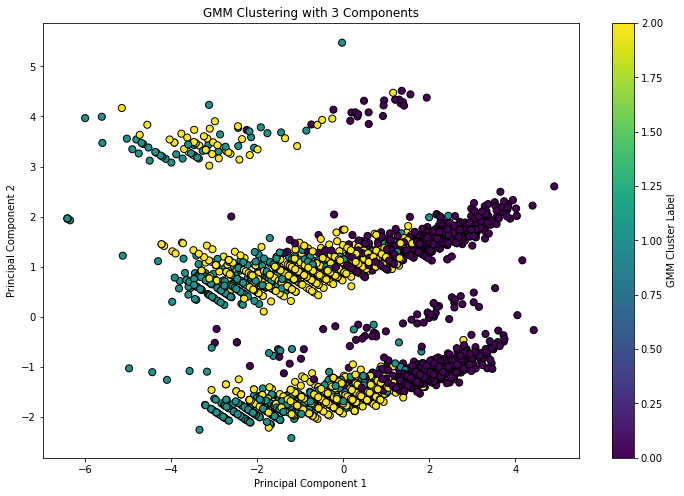


Processing GMM with 4 components:


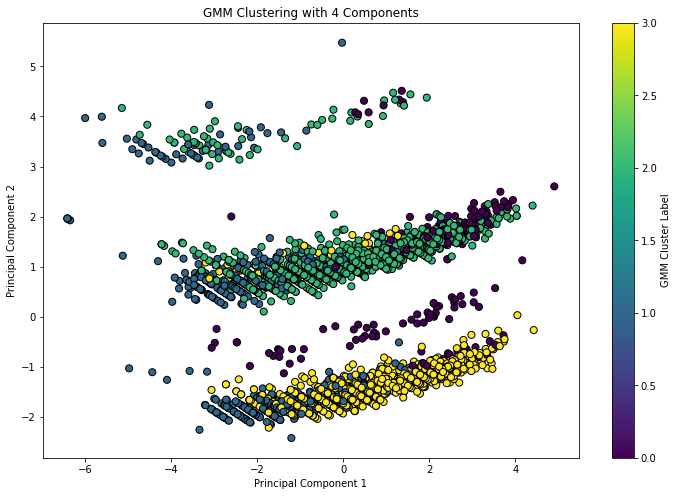


Processing GMM with 5 components:


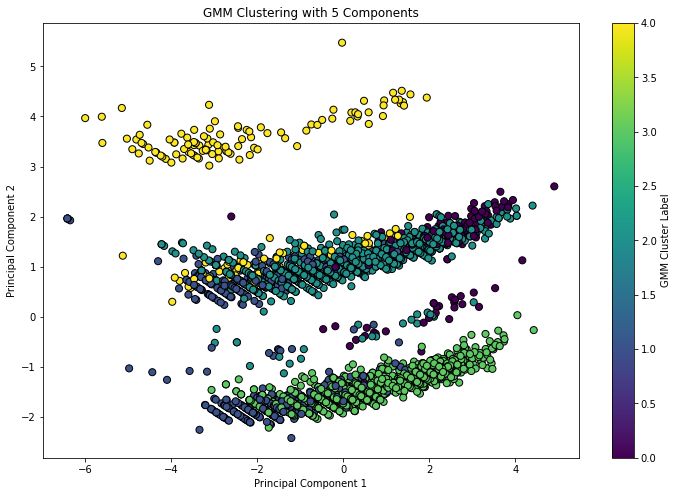


Optimizing DBSCAN:
Best eps: 1.7, Best min_samples: 3, Best silhouette score: 0.5716680473719121


In [53]:
# Initialize lists to store metrics
results = []

# Plot and compute metrics for K-Means
for n in [2, 3, 4, 5]:
    print(f"\nProcessing K-Means with {n} clusters:")
    kmeans_labels = plot_kmeans_clusters(X_cleaned_pca, n)
    if kmeans_labels is not None:
        db_index, ch_index, _ = calculate_clustering_metrics(X_cleaned_pca, kmeans_labels)
        results.append({
            'Method': 'K-Means',
            'Clusters': n,
            'Davies-Bouldin Index': db_index,
            'Calinski-Harabasz Index': ch_index
        })

# Plot and compute metrics for Hierarchical Clustering
for n in [2, 3, 4, 5]:
    for method in ['ward', 'complete', 'average', 'single']:
        print(f"\nProcessing Hierarchical Clustering with {n} clusters and linkage method '{method}':")
        hierarchical_labels = plot_hierarchical_clusters(X_cleaned_pca, n, method)
        if hierarchical_labels is not None:
            db_index, ch_index, _ = calculate_clustering_metrics(X_cleaned_pca, hierarchical_labels)
            results.append({
                'Method': 'Hierarchical',
                'Clusters': n,
                'Linkage': method,
                'Davies-Bouldin Index': db_index,
                'Calinski-Harabasz Index': ch_index
            })

# Plot and compute metrics for GMM
for n in [2, 3, 4, 5]:
    print(f"\nProcessing GMM with {n} components:")
    gmm_labels = plot_gmm_clusters(X_cleaned_pca, n)
    if gmm_labels is not None:
        db_index, ch_index, _ = calculate_clustering_metrics(X_cleaned_pca, gmm_labels)
        results.append({
            'Method': 'GMM',
            'Components': n,
            'Davies-Bouldin Index': db_index,
            'Calinski-Harabasz Index': ch_index
        })

# Optimize and plot DBSCAN
print("\nOptimizing DBSCAN:")
eps_values = np.linspace(0.1, 2.0, 20)
min_samples_values = range(3, 10)
best_dbscan = optimize_dbscan(X_cleaned_pca, eps_values, min_samples_values)



Clustering Results:
          Method  Clusters  Davies-Bouldin Index  Calinski-Harabasz Index  \
0        K-Means       2.0              1.012980               531.706446   
1        K-Means       3.0              1.601331               631.101985   
2        K-Means       4.0              1.417364               585.884579   
3        K-Means       5.0              1.222825               698.016182   
4   Hierarchical       2.0              1.974166               555.296405   
5   Hierarchical       2.0              0.184335                22.716819   
6   Hierarchical       2.0              0.268511               188.900720   
7   Hierarchical       2.0              0.268511               188.900720   
8   Hierarchical       3.0              1.545226               624.815006   
9   Hierarchical       3.0              0.239636               107.120791   
10  Hierarchical       3.0              0.239636               107.120791   
11  Hierarchical       3.0              0.239636       

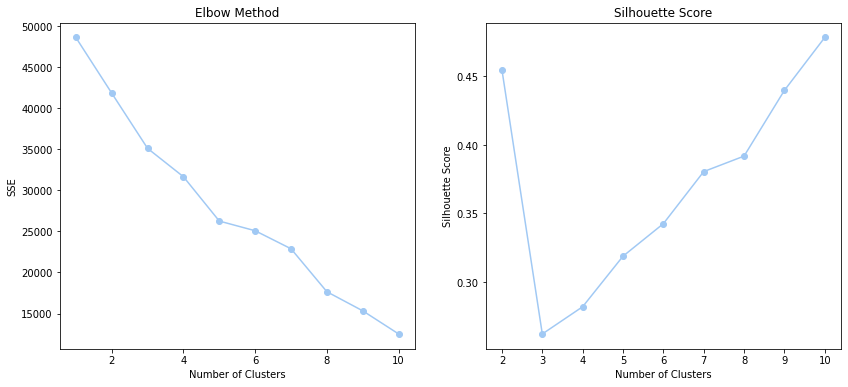

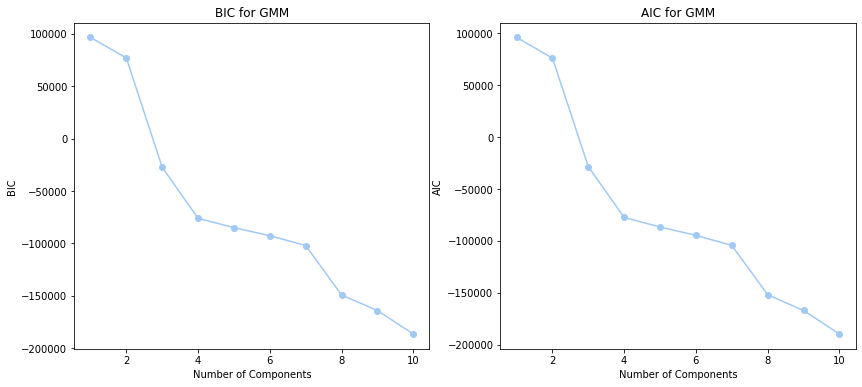

In [54]:
# Show final results
results_df = pd.DataFrame(results)
print("\nClustering Results:")
print(results_df)

# Plot Elbow Method and Silhouette Score for K-Means
plot_elbow_method(X_cleaned_pca, max_clusters=10)

# Plot BIC and AIC for GMM
plot_gmm_bic_aic(X_cleaned_pca, max_components=10)

In [55]:
results_df.to_csv('clustering_results.csv', index=False)


## Comparison with Other Algorithms

### K-Means

- **Strengths**: 
  - Efficient and straightforward for spherical clusters.
- **Weaknesses**: 
  - Assumes clusters are spherical and equally sized.
  - Requires specifying the number of clusters in advance.

### Hierarchical Clustering

- **Strengths**: 
  - Does not require specifying the number of clusters in advance.
  - Can be insightful with dendrograms.
- **Weaknesses**: 
  - Can be computationally expensive, especially with large datasets.

### Gaussian Mixture Model (GMM)

- **Strengths**: 
  - Flexible with cluster shapes.
  - Can model elliptical clusters.
- **Weaknesses**: 
  - Requires specifying the number of components.
  - Can be complex to tune.

### DBSCAN

- **Strengths**: 
  - Finds arbitrarily shaped clusters.
  - Handles noise effectively.
- **Weaknesses**: 
  - Sensitive to parameter settings.
  - Can struggle with clusters of varying densities.

## Recommendation

Given your results:

- **Silhouette Score**: The silhouette score for DBSCAN is reasonably good, suggesting that the clusters are well-separated to some extent.
- **Clustering Comparison**: If your data contains noise and has non-spherical clusters, DBSCAN might be the best option among the algorithms tested.

### Final Decision Steps:

1. **Visualize DBSCAN Clusters**: Plot the clusters formed by DBSCAN to ensure they align with your expectations.
2. **Compare Metrics**: Compare the silhouette score of DBSCAN with the Davies-Bouldin Index (DBI) and Calinski-Harabasz Index (CHI) of other methods. Higher silhouette scores generally indicate better-defined clusters.
3. **Consider Application Needs**: Choose DBSCAN if handling noise and discovering clusters of arbitrary shapes is critical for your application. If cluster shape and compactness are more important, K-Means or Hierarchical Clustering may be preferable.


In [56]:
pca_df_V7

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.891914  1.251560 -0.691599 -0.627786 -1.274357 -0.542617 -0.339701   
1     0.750942  1.331289 -0.780240 -0.609598 -1.206409 -0.485651 -0.298993   
2     0.344088 -1.542355  0.016712  0.522073 -0.884872 -0.289614 -0.117100   
3    -1.340021  0.631491 -1.613659  0.433543 -0.267093 -0.210466 -0.173373   
4     1.549465 -1.401281  0.339371  0.841328  1.582963 -0.142673 -0.284221   
...        ...       ...       ...       ...       ...       ...       ...   
3281  1.323046 -1.273225  0.197002  0.870539  1.692097 -0.051178 -0.218838   
3282  1.323046 -1.273225  0.197002  0.870539  1.692097 -0.051178 -0.218838   
3283  2.093799  1.448966 -0.384396 -0.331750  1.197987 -0.378166 -0.493436   
3284 -0.575723 -1.822958 -0.357435  0.970934 -0.471421 -0.160005 -0.053664   
3285 -1.147831  0.751654 -1.550860  0.313728 -0.350768 -0.219121 -0.171795   

           PC8       PC9  SellingPrice  
0    -0.265876 -0.246082       60000.0  
1    -0.266834 -0.232066      135000.0  
2    -0.148675 -0.122367      600000.0  
3    -0.149668 -0.180600      250000.0  
4     0.149224 -0.059200      450000.0  
...        ...       ...           ...  
3281  0.147686 -0.036687      409999.0  
3282  0.147686 -0.036687      409999.0  
3283  0.027893 -0.178021      110000.0  
3284 -0.098760 -0.097490      865000.0  
3285 -0.164566 -0.180668      225000.0  

[3286 rows x 10 columns]

In [57]:
# Use the best clustering method: 
""" 
    best_method = 'Hierarchical'
    best_method = 'K-Means'
    best_method = 'GMM'
"""

best_method = 'K-Means'

# Use the best no of clusters and another options 
""" 
    best_components_GMM = 2
    best_clusters_K_Means = 5
    best_clusters_Hierarchical= 2
    best_linkage = 'complete'
"""
best_clusters_K_Means = 5


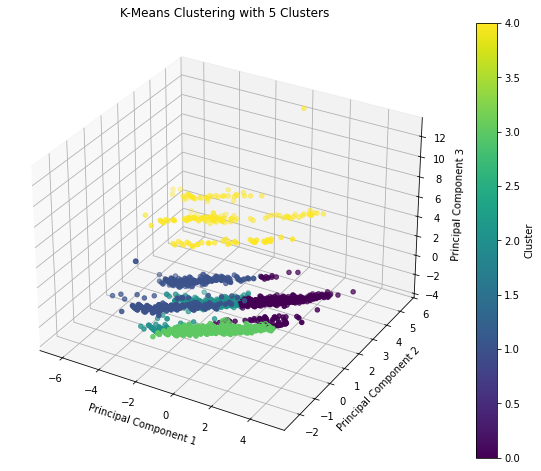

Cluster Centers:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.834976  1.322217 -0.400714 -0.458055 -0.031577 -0.074710  0.079799   
1 -1.722364 -0.538928  1.001455 -2.146072  0.221982  0.043790 -0.105070   
2 -1.350503  0.655062 -1.616693  0.442595 -0.097502 -0.122042  0.009061   
3  0.739115 -1.392516  0.057933  0.687300 -0.000228  0.100980 -0.029895   
4 -2.109897  2.715358  4.173575  2.705503 -0.211123 -0.023779  0.156941   

        PC8       PC9  
0 -0.059788  0.126102  
1  0.142589  0.086848  
2 -0.120117 -0.145121  
3  0.035043 -0.050689  
4  0.018815  0.055188  


In [58]:
if best_method == 'K-Means':
    # Initialize KMeans with the selected number of clusters
    kmeans = KMeans(n_clusters=best_clusters_K_Means, random_state=42)
    
    # Fit the model and predict clusters
    clusters_K_Means = kmeans.fit_predict(X_cleaned_pca)
    
    # Add cluster labels to the PCA DataFrame
    X_cleaned_pca_with_clusters_K_Means = pd.DataFrame(X_cleaned_pca, columns=[f'PC{i+1}' for i in range(X_cleaned_pca.shape[1])])
    X_cleaned_pca_with_clusters_K_Means['Cluster'] = clusters_K_Means

    # 3D Plot the clustered data
    if X_cleaned_pca.shape[1] >= 3:  # Ensure there are at least 3 components for 3D plotting
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(
            X_cleaned_pca_with_clusters_K_Means['PC1'],
            X_cleaned_pca_with_clusters_K_Means['PC2'],
            X_cleaned_pca_with_clusters_K_Means['PC3'],
            c=X_cleaned_pca_with_clusters_K_Means['Cluster'],
            cmap='viridis',
            marker='o'
        )
        plt.title('K-Means Clustering with 5 Clusters')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        plt.colorbar(scatter, label='Cluster')
        plt.show()
    else:
        print("Not enough principal components for 3D plotting.")

    # Optional: Save the clustered results to a CSV file
    X_cleaned_pca_with_clusters_K_Means.to_csv('clustered_data_K_Means.csv', index=False)

    # Display cluster centers
    cluster_centers_K_Means = kmeans.cluster_centers_
    print("Cluster Centers:")
    print(pd.DataFrame(cluster_centers_K_Means, columns=[f'PC{i+1}' for i in range(X_cleaned_pca.shape[1])]))

elif best_method == 'Hierarchical':
    # Initialize AgglomerativeClustering with the selected number of clusters and linkage method
    hierarchical = AgglomerativeClustering(n_clusters=best_clusters_Hierarchical, linkage=best_linkage)
    
    # Fit the model and predict clusters
    clusters_Hierarchical = hierarchical.fit_predict(X_cleaned_pca)
    
    # Add cluster labels to the PCA DataFrame
    X_cleaned_pca_with_clusters_hierarchical = pd.DataFrame(X_cleaned_pca, columns=[f'PC{i+1}' for i in range(X_cleaned_pca.shape[1])])
    X_cleaned_pca_with_clusters_hierarchical['Cluster'] = clusters_Hierarchical

    # 3D Plot the clustered data
    if X_cleaned_pca.shape[1] >= 3:  # Ensure there are at least 3 components for 3D plotting
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(
            X_cleaned_pca_with_clusters_hierarchical['PC1'],
            X_cleaned_pca_with_clusters_hierarchical['PC2'],
            X_cleaned_pca_with_clusters_hierarchical['PC3'],
            c=X_cleaned_pca_with_clusters_hierarchical['Cluster'],
            cmap='viridis',
            marker='o'
        )
        plt.title('Hierarchical Clustering with 2 Clusters and Complete Linkage')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        plt.colorbar(scatter, label='Cluster')
        plt.show()
    else:
        print("Not enough principal components for 3D plotting.")

    # Optional: Save the clustered results to a CSV file
    X_cleaned_pca_with_clusters_hierarchical.to_csv('clustered_data_Hierarchical.csv', index=False)

elif best_method == 'GMM':
    # Initialize GaussianMixture with the selected number of components
    gmm = GaussianMixture(n_components=best_components_GMM, random_state=42)
    
    # Fit the model and predict clusters
    clusters_GMM = gmm.fit_predict(X_cleaned_pca)
    
    # Add cluster labels to the PCA DataFrame
    X_cleaned_pca_with_clusters_GMM = pd.DataFrame(X_cleaned_pca, columns=[f'PC{i+1}' for i in range(X_cleaned_pca.shape[1])])
    X_cleaned_pca_with_clusters_GMM['Cluster'] = clusters_GMM

    # 3D Plot the clustered data
    if X_cleaned_pca.shape[1] >= 3:  # Ensure there are at least 3 components for 3D plotting
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(
            X_cleaned_pca_with_clusters_GMM['PC1'],
            X_cleaned_pca_with_clusters_GMM['PC2'],
            X_cleaned_pca_with_clusters_GMM['PC3'],
            c=X_cleaned_pca_with_clusters_GMM['Cluster'],
            cmap='viridis',
            marker='o'
        )
        plt.title('GMM Clustering with 2 Components')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        plt.colorbar(scatter, label='Cluster')
        plt.show()
    else:
        print("Not enough principal components for 3D plotting.")

    # Optional: Save the clustered results to a CSV file
    X_cleaned_pca_with_clusters_GMM.to_csv('clustered_data_GMM.csv', index=False)

    # Display the Gaussian Mixture model's parameters
    print("Gaussian Mixture Model Parameters:")
    print(f"Means:\n{gmm.means_}")
    print(f"Covariances:\n{gmm.covariances_}")
    print(f"Weights:\n{gmm.weights_}")

else:
    print("Best method not recognized. Please choose 'K-Means', 'Hierarchical', or 'GMM'.")

<span style="color: #32CD32; font-weight: bold;">**Classification and Prediction**</span>


In [59]:
# Load the clustered data for clustering task
After_Clustering_V8 = pd.read_csv('clustered_data_K_Means.csv')

# Load the dataset with selling prices

# Save the data frame as 'pca_df_V7'
pca_df_V7.to_csv('pca_df_V7.csv', index=False)
# Load your data from 'clustered_data.csv'
pca_df_V7 = pd.read_csv('pca_df_V7.csv')

# Check the first few rows of the data
After_Clustering_V8

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.891914  1.251560 -0.691599 -0.627786 -1.274357 -0.542617 -0.339701   
1     0.750942  1.331289 -0.780240 -0.609598 -1.206409 -0.485651 -0.298993   
2     0.344088 -1.542355  0.016712  0.522073 -0.884872 -0.289614 -0.117100   
3    -1.340021  0.631491 -1.613659  0.433543 -0.267093 -0.210466 -0.173373   
4     1.549465 -1.401281  0.339371  0.841328  1.582963 -0.142673 -0.284221   
...        ...       ...       ...       ...       ...       ...       ...   
3281  1.323046 -1.273225  0.197002  0.870539  1.692097 -0.051178 -0.218838   
3282  1.323046 -1.273225  0.197002  0.870539  1.692097 -0.051178 -0.218838   
3283  2.093799  1.448966 -0.384396 -0.331750  1.197987 -0.378166 -0.493436   
3284 -0.575723 -1.822958 -0.357435  0.970934 -0.471421 -0.160005 -0.053664   
3285 -1.147831  0.751654 -1.550860  0.313728 -0.350768 -0.219121 -0.171795   

           PC8       PC9  Cluster  
0    -0.265876 -0.246082        0  
1    -0.266834 -0.232066        0  
2    -0.148675 -0.122367        3  
3    -0.149668 -0.180600        2  
4     0.149224 -0.059200        3  
...        ...       ...      ...  
3281  0.147686 -0.036687        3  
3282  0.147686 -0.036687        3  
3283  0.027893 -0.178021        0  
3284 -0.098760 -0.097490        3  
3285 -0.164566 -0.180668        2  

[3286 rows x 10 columns]

In [60]:
pca_df_V7

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.891914  1.251560 -0.691599 -0.627786 -1.274357 -0.542617 -0.339701   
1     0.750942  1.331289 -0.780240 -0.609598 -1.206409 -0.485651 -0.298993   
2     0.344088 -1.542355  0.016712  0.522073 -0.884872 -0.289614 -0.117100   
3    -1.340021  0.631491 -1.613659  0.433543 -0.267093 -0.210466 -0.173373   
4     1.549465 -1.401281  0.339371  0.841328  1.582963 -0.142673 -0.284221   
...        ...       ...       ...       ...       ...       ...       ...   
3281  1.323046 -1.273225  0.197002  0.870539  1.692097 -0.051178 -0.218838   
3282  1.323046 -1.273225  0.197002  0.870539  1.692097 -0.051178 -0.218838   
3283  2.093799  1.448966 -0.384396 -0.331750  1.197987 -0.378166 -0.493436   
3284 -0.575723 -1.822958 -0.357435  0.970934 -0.471421 -0.160005 -0.053664   
3285 -1.147831  0.751654 -1.550860  0.313728 -0.350768 -0.219121 -0.171795   

           PC8       PC9  SellingPrice  
0    -0.265876 -0.246082       60000.0  
1    -0.266834 -0.232066      135000.0  
2    -0.148675 -0.122367      600000.0  
3    -0.149668 -0.180600      250000.0  
4     0.149224 -0.059200      450000.0  
...        ...       ...           ...  
3281  0.147686 -0.036687      409999.0  
3282  0.147686 -0.036687      409999.0  
3283  0.027893 -0.178021      110000.0  
3284 -0.098760 -0.097490      865000.0  
3285 -0.164566 -0.180668      225000.0  

[3286 rows x 10 columns]

In [61]:
# Separate features and target variable
X_clustering = After_Clustering_V8[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']]
y_clustering = After_Clustering_V8['Cluster']


In [62]:
# Separate features and target variable for selling price
X_price = pca_df_V7[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']]
y_price = pca_df_V7['SellingPrice']  # Make sure this column exists in pca_df_V7


In [63]:
# Shuffle and split the data for clustering task
X_clustering, y_clustering = shuffle(X_clustering, y_clustering, random_state=42)
X_clustering_train, X_clustering_test, y_clustering_train, y_clustering_test = train_test_split(X_clustering, y_clustering, test_size=0.45, random_state=42)
#test_size=0.30


In [64]:
# Shuffle and split the data for selling price task
X_price, y_price = shuffle(X_price, y_price, random_state=42)
X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price, y_price, test_size=0.45, random_state=42)
#test_size=0.30

In [65]:
# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

Clustering Classification Results:
Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9946
Cross-Validation Accuracy: 0.9967 ± 0.0026
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       344
           1       1.00      1.00      1.00       243
           2       1.00      0.99      1.00       278
           3       1.00      0.99      1.00       531
           4       1.00      1.00      1.00        83

    accuracy                           0.99      1479
   macro avg       1.00      1.00      1.00      1479
weighted avg       0.99      0.99      0.99      1479

Confusion Matrix:
[[342   0   0   2   0]
 [  1 242   0   0   0]
 [  2   0 276   0   0]
 [  3   0   0 528   0]
 [  0   0   0   0  83]]




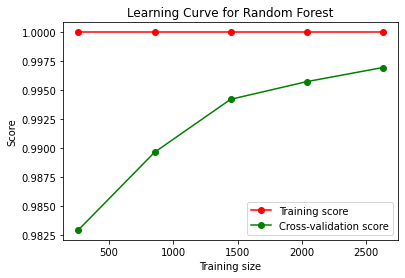

Model: Support Vector Machine
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9953
Cross-Validation Accuracy: 0.9963 ± 0.0018
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       344
           1       1.00      1.00      1.00       243
           2       1.00      1.00      1.00       278
           3       0.99      1.00      1.00       531
           4       1.00      1.00      1.00        83

    accuracy                           1.00      1479
   macro avg       1.00      1.00      1.00      1479
weighted avg       1.00      1.00      1.00      1479

Confusion Matrix:
[[339   1   1   3   0]
 [  1 242   0   0   0]
 [  1   0 277   0   0]
 [  0   0   0 531   0]
 [  0   0   0   0  83]]




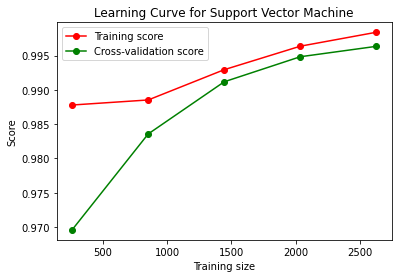

Model: K-Nearest Neighbors
Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.9946
Cross-Validation Accuracy: 0.9945 ± 0.0012
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       344
           1       1.00      1.00      1.00       243
           2       0.99      1.00      1.00       278
           3       0.99      1.00      1.00       531
           4       1.00      1.00      1.00        83

    accuracy                           0.99      1479
   macro avg       1.00      1.00      1.00      1479
weighted avg       0.99      0.99      0.99      1479

Confusion Matrix:
[[337   0   2   5   0]
 [  1 242   0   0   0]
 [  0   0 278   0   0]
 [  0   0   0 531   0]
 [  0   0   0   0  83]]




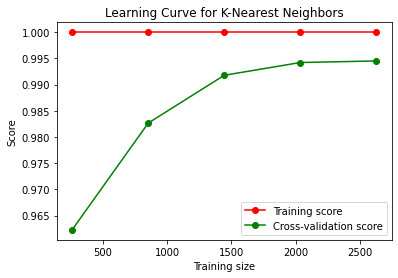

Model: Naive Bayes
Best Parameters: {}
Accuracy: 0.9554
Cross-Validation Accuracy: 0.9507 ± 0.0109
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       344
           1       0.97      1.00      0.98       243
           2       0.92      0.93      0.93       278
           3       0.97      0.98      0.97       531
           4       1.00      1.00      1.00        83

    accuracy                           0.96      1479
   macro avg       0.96      0.96      0.96      1479
weighted avg       0.96      0.96      0.96      1479

Confusion Matrix:
[[308   8  23   5   0]
 [  0 243   0   0   0]
 [  6   0 259  13   0]
 [ 11   0   0 520   0]
 [  0   0   0   0  83]]




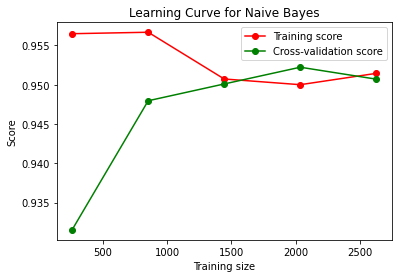

Model: Logistic Regression
Best Parameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.9959
Cross-Validation Accuracy: 0.9963 ± 0.0007
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       344
           1       1.00      0.99      1.00       243
           2       0.99      1.00      1.00       278
           3       0.99      1.00      1.00       531
           4       1.00      0.99      0.99        83

    accuracy                           1.00      1479
   macro avg       1.00      0.99      1.00      1479
weighted avg       1.00      1.00      1.00      1479

Confusion Matrix:
[[341   0   0   3   0]
 [  1 241   1   0   0]
 [  0   0 278   0   0]
 [  0   0   0 531   0]
 [  0   0   1   0  82]]




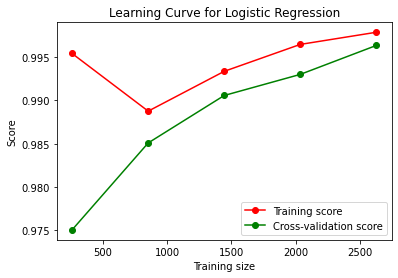

In [68]:
# Define parameter grids for hyperparameter tuning
param_grids = {
    'Random Forest': {
        'clf': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Support Vector Machine': {
        'clf': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'K-Nearest Neighbors': {
        'clf': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Naive Bayes': {
        'clf': GaussianNB(),
        'params': {}  # Naive Bayes has no hyperparameters to tune
    },
    'Logistic Regression': {
        'clf': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2']
        }
    }
}

# Train and evaluate each classifier with hyperparameter tuning
print("Clustering Classification Results:")
for name, grid in param_grids.items():
    clf = grid['clf']
    param_grid = grid['params']
    
    # Perform Grid Search with Cross-Validation
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_clustering_train, y_clustering_train)
    
    # Get the best estimator
    best_clf = grid_search.best_estimator_

    # Predict on the test set
    y_clustering_pred = best_clf.predict(X_clustering_test)

    # Evaluate the model
    scores = cross_val_score(best_clf, X_clustering, y_clustering, cv=5)
    
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy_score(y_clustering_test, y_clustering_pred):.4f}")
    print(f"Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    print("Classification Report:")
    print(classification_report(y_clustering_test, y_clustering_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_clustering_test, y_clustering_pred))
    print("\n")

    # Plot learning curves
    train_sizes, train_scores, test_scores = learning_curve(best_clf, X_clustering, y_clustering, cv=5)
    plt.figure()
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label='Cross-validation score')
    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title(f'Learning Curve for {name}')
    plt.legend(loc='best')
    plt.show()

**Interpreting the Learning Curves**

**Balanced Scores:** 
    
    The training and validation scores are close, and both increase as the training size grows, indicating good model performance.

**High Training Score, Low Validation Score:**
    
    Indicates overfitting; consider reducing model complexity or increasing regularization.

**Low Scores: Indicates underfitting;**
    
    consider increasing model complexity or adding features.

**Analysis**


**Performance:** 

    Random Forest, SVM, and KNN show very high accuracy and excellent performance metrics. Logistic Regression also performs very well, with slightly lower accuracy than Random Forest and SVM but still very strong.

**Naive Bayes:** 

    This model underperforms relative to the others, with lower accuracy and higher misclassification rates. This could be due to the Naive Bayes assumptions not aligning well with the data characteristics.

**Model Comparison:** 

    Random Forest, SVM, and KNN are consistently high-performing. Logistic Regression is also a strong contender, especially given its performance in cross-validation. Naive Bayes is less effective for this particular problem.

**Learning Curves:** 

    If you plot learning curves, you should see that the training and cross-validation scores converge for the models with high performance, indicating good generalization.

## Model Performance Summary

### 1. Logistic Regression, K-Nearest Neighbors, and Random Forest

- **Constant High Training Score**: This suggests that the model has learned the training data well and is performing well on it. This high score indicates the model fits the training data very well.

- **Increasing Validation Score**: If the validation score is also increasing as the training size increases, it indicates that the model is generalizing well to unseen data and is likely not overfitting. This is a positive sign, showing that the model's performance improves with more training data.

- **Plateauing Scores**: If both training and validation scores reach a plateau, it indicates that further increasing the training size may not significantly improve the model's performance. The model has likely reached its optimal performance for the given complexity.

### 2. Support Vector Machine (SVM)

- **Increasing Training and Validation Scores**: For SVM, if both training and validation scores improve with increasing training size, it indicates that the model is effectively learning from more data and is likely capturing the underlying patterns better.

- **Good Generalization**: This suggests that the SVM model is not overfitting and can generalize well to new, unseen data. This is usually a good sign for models that are capable of learning complex decision boundaries.

### 3. Naive Bayes

- **Overlapping Training and Validation Scores**: When the training and validation scores are overlapping and do not change much with increasing training size, it suggests that Naive Bayes is likely struggling to improve performance with more data.

- **Consistent Performance**: This might be due to the simplicity of the Naive Bayes model. It assumes feature independence, which may not capture complex relationships in the data well. The overlapping scores indicate that increasing the training size does not significantly improve the model's ability to generalize.

## Summary

- **Logistic Regression, K-Nearest Neighbors, and Random Forest**: The observed behavior is generally positive, showing that these models benefit from more training data and can generalize well without significant overfitting.

- **SVM**: The increase in both training and validation scores with more data suggests good generalization and effectiveness of the model.

- **Naive Bayes**: The lack of improvement with more data suggests that this model might be too simplistic for the problem at hand, and its performance is capped by its assumptions.

## Next Steps

- **For Models with Good Performance (Logistic Regression, K-Nearest Neighbors, Random Forest, SVM)**:
  - Consider further tuning hyperparameters or experimenting with different features to see if performance can be improved further.
  - If the models are performing well, you may also look into ensemble methods or more complex models if needed.

- **For Naive Bayes**:
  - You might want to consider more complex models or feature engineering to improve performance.
  - Evaluate if a different classification model might be more appropriate for your dataset.

By analyzing these trends, you can make informed decisions about which models to use and how to proceed with model tuning and selection.

---

## Model Selection Summary

### 1. Logistic Regression

- **Pros**:
  - Simple and interpretable.
  - Performs well with high-dimensional data and when classes are linearly separable.
  - High accuracy and good cross-validation score in your results.

- **Cons**:
  - Assumes linear relationships between features and the target variable.
  - May not capture complex patterns.

- **When to Choose**: If you need a model that is easy to interpret and your data is linearly separable, logistic regression is a good choice.

### 2. K-Nearest Neighbors (KNN)

- **Pros**:
  - Simple to understand and implement.
  - Effective if the decision boundary is not linear.

- **Cons**:
  - Computationally expensive for large datasets as it requires distance calculations for each prediction.
  - Sensitive to irrelevant features and the scale of data.

- **When to Choose**: If you have a manageable dataset size and the decision boundary is expected to be non-linear, KNN can be effective.

### 3. Random Forest

- **Pros**:
  - Handles large datasets well and can model complex relationships.
  - Robust to overfitting and provides feature importance.
  - High accuracy in your results and performs well across various metrics.

- **Cons**:
  - Less interpretable than simpler models.
  - Can be computationally intensive.

- **When to Choose**: If you want a model that is robust, can handle various types of data, and is less prone to overfitting, random forest is a solid choice.

### 4. Support Vector Machine (SVM)

- **Pros**:
  - Effective in high-dimensional spaces and with a clear margin of separation.
  - Can model non-linear boundaries using kernel tricks.

- **Cons**:
  - Can be computationally intensive and slow with large datasets.
  - Requires careful tuning of hyperparameters.

- **When to Choose**: If your dataset has complex boundaries and you can afford computational resources for training, SVM can be a powerful option.

### 5. Naive Bayes

- **Pros**:
  - Simple and fast, especially with large datasets.
  - Works well with categorical features and performs well with a large number of features.

- **Cons**:
  - Assumes independence between features, which may not hold in practice.
  - Performance can be limited by its simplicity.

- **When to Choose**: If you need a fast and simple model and the independence assumption holds reasonably well, Naive Bayes can be a good choice.

## Recommendation

- **Random Forest**: Given its high accuracy, robustness, and good cross-validation scores, it appears to be a strong performer. It is particularly effective for handling complex datasets with a variety of feature types.

- **Logistic Regression**: Also a strong candidate due to its high accuracy and good cross-validation results. It is suitable if interpretability and linear separability are important.

- **SVM**: Although it performed well, consider its computational cost and the need for careful parameter tuning.

**Overall Choice**: Random Forest is often a good general-purpose classifier due to its robustness and ability to handle complex data without heavy parameter tuning. However, if interpretability or computational efficiency is critical, Logistic Regression might be preferred.






























## Model Performance with Different Test Sizes

### Test Size = 0.30

- **Logistic Regression, K-Nearest Neighbors, and Random Forest**:
  - **Constant High Training Score**: The training score remains high and constant as the training size increases, indicating that these models fit the training data well.
  - **Increasing Validation Score**: The validation score improves with increasing training size, suggesting that the models generalize well to unseen data and are not overfitting.
  - **Plateauing Scores**: Both training and validation scores eventually plateau, indicating that further increasing the training size may not significantly enhance the model's performance.

- **Support Vector Machine (SVM)**:
  - **Increasing Training and Validation Scores**: Both training and validation scores increase with training size, indicating that the SVM effectively learns from more data and captures underlying patterns better.
  - **Good Generalization**: This suggests the SVM is not overfitting and can generalize well.

- **Naive Bayes**:
  - **Overlapping Training and Validation Scores**: The scores overlap and do not improve much with increased training size, indicating that Naive Bayes may struggle to enhance performance with more data due to its simplicity.

### Test Size = 0.45

- **K-Nearest Neighbors and Random Forest**:
  - **Constant High Training Score**: The training score remains high and constant as training size increases.
  - **Validation Score Trends**: Validation scores initially improve with increased training size but start to decrease after a certain point (around 2500 training size). This indicates that after a certain size, the models may begin to overfit.

- **Support Vector Machine (SVM)**:
  - **Increasing Training and Validation Scores**: Training and validation scores continue to increase with training size, indicating that the SVM model learns effectively and generalizes well.

- **Naive Bayes**:
  - **Overlapping Training and Validation Scores**: Training and validation scores remain overlapping and consistent with increased training size, indicating that Naive Bayes' performance does not significantly improve with more data.

- **Logistic Regression**:
  - **Initial Decrease in Training Score**: The training score decreases initially as training size increases.
  - **Increasing Validation Score**: The validation score improves until a training size of around 1000, after which both training and validation scores increase with more training data.

## Summary

- **Logistic Regression**: Shows a unique pattern where the training score decreases initially but improves with a larger training size, alongside an increasing validation score until reaching a certain point.

- **K-Nearest Neighbors and Random Forest**: Demonstrate good performance initially, but may start to overfit after a certain training size is reached.

- **SVM**: Continues to perform well with increasing training size, indicating good generalization and effectiveness.

- **Naive Bayes**: Shows overlapping training and validation scores, suggesting that it struggles to improve with more data.

When selecting a model, consider these trends and choose based on performance, generalization ability, and the behavior of scores with varying training sizes.


<span style="color: #20B2AA; font-weight: bold;">**Statistics**</span>


In [ ]:

# Initialize a dictionary to hold the label encoders for each categorical column
label_encoders = {}

# List of categorical columns to encode
categorical_columns = ['fuel', 'transmission', 'owner', 'seller_type']

# Iterate through each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    rawdata[column] = le.fit_transform(rawdata[column])
    label_encoders[column] = le

# Print the label mapping for each column
print("Label mapping for 'fuel':", label_encoders['fuel'].classes_)
print("Label mapping for 'transmission':", label_encoders['transmission'].classes_)
print("Label mapping for 'owner':", label_encoders['owner'].classes_)
print("Label mapping for 'seller_type':", label_encoders['seller_type'].classes_)


In [ ]:
# Define reverse mappings based on provided information
reverse_mappings = {
    'fuel': {0: 'CNG', 1: 'Diesel', 2: 'Electric', 3: 'LPG', 4: 'Petrol'},
    'transmission': {0: 'Automatic', 1: 'Manual'},
    'owner': {0: 'First Owner', 1: 'Fourth & Above Owner', 2: 'Second Owner', 3: 'Test Drive Car', 4: 'Third Owner'},
    'seller_type': {0: 'Dealer', 1: 'Individual', 2: 'Trustmark Dealer'}
}

# Create a new DataFrame with the original categorical values
clustered_Decoded_df = combined_df.copy()

# Apply reverse mappings to decode the categorical columns
for column, mapping in reverse_mappings.items():
    clustered_Decoded_df[column] = clustered_Decoded_df[column].map(mapping)

# Display the resulting DataFrame
clustered_Decoded_df.head()

In [ ]:

# Assuming combined_df is already defined and includes the 'Cluster' column
cluster_Decoded_stats = clustered_Decoded_df.groupby('Cluster').agg({
    'selling_price': 'mean',
    'km_driven': 'mean',
}).reset_index()

print(cluster_Decoded_stats)
print('################################################################')

# Sort by 'selling_price' in descending order
cluster_Decoded_stats_sorted_Price = cluster_Decoded_stats.sort_values(by='selling_price', ascending=False)

print(cluster_Decoded_stats_sorted_Price)



In [ ]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Plot mean selling price by cluster
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='selling_price', data=cluster_Decoded_stats_sorted_Price, palette='viridis')
plt.title('Mean Selling Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Selling Price')
plt.show()

# Plot mean km_driven by cluster
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='km_driven', data=cluster_Decoded_stats_sorted_Price, palette='viridis')
plt.title('Mean Km Driven by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Km Driven')
plt.show()

In [ ]:
clustered_Decoded_df['fuel'].value_counts()

In [ ]:
clustered_Decoded_df['transmission'].value_counts()

In [ ]:
clustered_Decoded_df['owner'].value_counts()

In [ ]:
clustered_Decoded_df['seller_type'].value_counts()

In [ ]:
# Calculate the distribution of each categorical variable within each cluster
categorical_columns = ['fuel', 'transmission', 'owner', 'seller_type']
cluster_distribution = {}

for column in categorical_columns:
    distribution = clustered_Decoded_df.groupby('Cluster')[column].value_counts().unstack().fillna(0)
    distribution = distribution.div(distribution.sum(axis=1), axis=0)  # Normalize to percentages
    cluster_distribution[column] = distribution

# Print the percentage distributions for each categorical column
for column in categorical_columns:
    print(f"Distribution of {column} by Cluster:")
    print(cluster_distribution[column])
    print("\n")


In [49]:
###################################################################################################
def calculate_distributions(df, categorical_columns):
    """Calculate the distribution of each categorical variable within each cluster."""
    cluster_distribution = {}
    for column in categorical_columns:
        distribution = df.groupby('Cluster')[column].value_counts().unstack().fillna(0)
        distribution = distribution.div(distribution.sum(axis=1), axis=0)  # Normalize to percentages
        cluster_distribution[column] = distribution
    return cluster_distribution

def calculate_mean_values(df, numerical_columns):
    """Calculate the mean values of numerical columns for each cluster."""
    mean_values = df.groupby('Cluster')[numerical_columns].mean()
    return mean_values

def generate_summary(distribution_dict, mean_values):
    """Generate a textual summary for each cluster."""
    summaries = []
    
    for cluster, data in distribution_dict['fuel'].iterrows():
        selling_price = mean_values.loc[cluster, 'selling_price']
        km_driven = mean_values.loc[cluster, 'km_driven']
        
        summary = f"Cluster {cluster}:"
        summary += f" Average selling price: ${selling_price:,.2f}, Average km driven: {km_driven:,.0f}"
        summary += f", Dominantly {data.idxmax()} ({data.max()*100:.2f}%)"
        
        transmission = distribution_dict['transmission'].loc[cluster]
        summary += f", {transmission.idxmax()} transmission ({transmission.max()*100:.2f}%)"
        
        owner = distribution_dict['owner'].loc[cluster]
        summary += f", mostly {owner.idxmax()} ({owner.max()*100:.2f}%)"
        
        seller_type = distribution_dict['seller_type'].loc[cluster]
        summary += f", {seller_type.idxmax()} sellers ({seller_type.max()*100:.2f}%)"
        
        summaries.append(summary)
    
    return summaries

def plot_distributions(distribution_dict, categorical_columns):
    """Plot the distributions of categorical variables by cluster."""
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    for i, column in enumerate(categorical_columns):
        ax = axes.flatten()[i]
        distribution = distribution_dict[column]
        distribution.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f'Distribution of {column} by Cluster')
        ax.set_xlabel('Cluster')
        ax.set_ylabel('Percentage')
        ax.legend(title=column)
    
    plt.tight_layout()
    plt.show()
###################################################################################################33



In [ ]:
# Example usage
categorical_columns = ['fuel', 'transmission', 'owner', 'seller_type']
numerical_columns = ['selling_price', 'km_driven']

# Assuming clustered_Decoded_df is your DataFrame
cluster_distribution = calculate_distributions(clustered_Decoded_df, categorical_columns)
mean_values = calculate_mean_values(clustered_Decoded_df, numerical_columns)
summaries = generate_summary(cluster_distribution, mean_values)

# Print summaries
for summary in summaries:
    print(summary)

# Plot distributions
plot_distributions(cluster_distribution, categorical_columns)

In [51]:
# # Create a DataFrame for summary statistics
# def create_summary_df(cluster_distribution, mean_values):
#     """Create a DataFrame from summary statistics for correlation analysis."""
#     summary_data = {
#         'Cluster': [],
#         'Average Selling Price': [],
#         'Average Km Driven': [],
#         'Dominant Fuel': [],
#         'Dominant Fuel Percentage': [],
#         'Dominant Transmission': [],
#         'Dominant Transmission Percentage': [],
#         'Dominant Owner': [],
#         'Dominant Owner Percentage': [],
#         'Dominant Seller Type': [],
#         'Dominant Seller Type Percentage': []
#     }
    
#     for cluster, data in cluster_distribution['fuel'].iterrows():
#         summary_data['Cluster'].append(cluster)
#         summary_data['Average Selling Price'].append(mean_values.loc[cluster, 'selling_price'])
#         summary_data['Average Km Driven'].append(mean_values.loc[cluster, 'km_driven'])
#         summary_data['Dominant Fuel'].append(data.idxmax())
#         summary_data['Dominant Fuel Percentage'].append(data.max()*100)
        
#         transmission = cluster_distribution['transmission'].loc[cluster]
#         summary_data['Dominant Transmission'].append(transmission.idxmax())
#         summary_data['Dominant Transmission Percentage'].append(transmission.max()*100)
        
#         owner = cluster_distribution['owner'].loc[cluster]
#         summary_data['Dominant Owner'].append(owner.idxmax())
#         summary_data['Dominant Owner Percentage'].append(owner.max()*100)
        
#         seller_type = cluster_distribution['seller_type'].loc[cluster]
#         summary_data['Dominant Seller Type'].append(seller_type.idxmax())
#         summary_data['Dominant Seller Type Percentage'].append(seller_type.max()*100)
    
#     return pd.DataFrame(summary_data)


In [52]:
# # Calculate the inertia for different numbers of clusters
# inertia = []
# K = range(1, 11)  # Testing 1 to 10 clusters

# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(features_scaled)
#     inertia.append(kmeans.inertia_)

# # Plot the elbow curve
# plt.figure(figsize=(8, 6))
# plt.plot(K, inertia, 'bo-')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [53]:
# # Compute Davies-Bouldin index
# db_index = davies_bouldin_score(features_scaled, labels)
# print(f"Davies-Bouldin Index: {db_index:.3f}")

In [54]:
# # Try different numbers of clusters
# cluster_range = range(2, 11)
# silhouette_scores = []
# dbi_scores = []

# for n_clusters in cluster_range:
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     labels = kmeans.fit_predict(features_scaled)
    
#     silhouette_avg = silhouette_score(features_scaled, labels)
#     dbi_avg = davies_bouldin_score(features_scaled, labels)
    
#     silhouette_scores.append(silhouette_avg)
#     dbi_scores.append(dbi_avg)
    
#     print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg:.3f}, Davies-Bouldin Index: {dbi_avg:.3f}")

# # Plot the results
# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('Number of clusters')
# ax1.set_ylabel('Silhouette Score', color=color)
# ax1.plot(cluster_range, silhouette_scores, color=color, marker='o', label='Silhouette Score')
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()
# color = 'tab:blue'
# ax2.set_ylabel('Davies-Bouldin Index', color=color)
# ax2.plot(cluster_range, dbi_scores, color=color, marker='o', label='Davies-Bouldin Index')
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
# plt.title('Clustering Evaluation Metrics')
# plt.show()

In [55]:
# from sklearn.decomposition import PCA

# # Reduce dimensionality for visualization
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(features_scaled)

# # Plot PCA result
# plt.figure(figsize=(10, 8))
# plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', alpha=0.5)
# plt.colorbar(label='Cluster')
# plt.title('PCA of Clustering Results')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.show()


Statistics per Cluster (K-Means):
   Cluster  Mean_Selling_Price  Min_Selling_Price  Max_Selling_Price  \
0        0       435485.918618            55001.0          4400001.0   
1        1       337541.485965            20001.0          8900001.0   
2        2       886583.290495           149001.0          8150001.0   
3        3       288996.362385            45001.0          1250001.0   

   Median_Selling_Price  Number_of_Rows  Number_of_Outliers  
0              350001.0             897                  56  
1              265001.0            1710                  61  
2              700001.0             747                  62  
3              225001.0             218                  19  



Statistics per Cluster (GMM):
   Cluster  Mean_Selling_Price  Min_Selling_Price  Max_Selling_Price  \
0        0       454816.511236            45001.0          4400001.0   
1        1       337314.932504            20001.0          8900001.0   
2        2       911930.411043           150001.0          8150001.0   
3        3       264160.441718            45001.0          1050001.0   

   Median_Selling_Price  Number_of_Rows  Number_of_Outliers  
0              350001.0            1068                  61  
1              265001.0            1689                  59  
2              715001.0             652                  54  
3              200001.0             163                  11  

